<h1 style="text-align: center; font-family: Verdana; font-size: 32px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; font-variant: small-caps; letter-spacing: 3px; color: #FF1493; background-color: #ffffff;">Bristol-Myers Squibb – Molecular Translation</h1>
<h2 style="text-align: center; font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: underline; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">Image Captioning - End-to-End Pipeline - <font color="red">EfficientNetV2</font></h2>
<h5 style="text-align: center; font-family: Verdana; font-size: 12px; font-style: normal; font-weight: bold; text-decoration: None; text-transform: none; letter-spacing: 1px; color: black; background-color: #ffffff;">CREATED BY: DARIEN SCHETTLER</h5>

<br>

---

<br>

<div class="alert alert-block alert-warning" style="margin: 2em; line-height: 1.7em; font-family: Verdana;">
    <b style="font-size: 16px;">🙏 &nbsp; CREDIT TO THE FOLLOWING NOTEBOOKS I USED IN CREATING THIS KERNEL:</b><br><br><i>If you liked this notebook please upvote these other notebooks. Without them I wouldn't have been able to make this!</i><br><br>- <a src="https://www.kaggle.com/yihdarshieh/detailed-guide-to-custom-training-with-tpus"><b>Awesome Notebook For Best Practices in Distributed Computing</b></a><br>- <a src="https://www.kaggle.com/markwijkhuizen/tensorflow-tpu-training-baseline-lb-16-92/comments"><b>The Amazing Mark Wijkhuizen's TPU Training Notebook For This Competition</b></a><br>
</div>



<p id="toc"></p>

<br><br>

<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: navy; background-color: #ffffff;">TABLE OF CONTENTS</h1>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#imports">0&nbsp;&nbsp;&nbsp;&nbsp;IMPORTS</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#background_information">1&nbsp;&nbsp;&nbsp;&nbsp;BACKGROUND INFORMATION</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#setup">2&nbsp;&nbsp;&nbsp;&nbsp;SETUP</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#helper_functions">3&nbsp;&nbsp;&nbsp;&nbsp;HELPER FUNCTIONS</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#dataset_preparation">4&nbsp;&nbsp;&nbsp;&nbsp;PREPARE THE DATASET</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#model_preparation">5&nbsp;&nbsp;&nbsp;&nbsp;MODEL PREPARATION</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#dataset_creation">6&nbsp;&nbsp;&nbsp;&nbsp;DATASET CREATION</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#model_training">7&nbsp;&nbsp;&nbsp;&nbsp;CUSTOM MODEL TRAINING</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#model_inference">8&nbsp;&nbsp;&nbsp;&nbsp;INFER ON TEST DATA</a></h3>

<br>

<a id="imports"></a>

<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; background-color: #ffffff; color: navy;" id="imports">0&nbsp;&nbsp;IMPORTS&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></h1>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
## gcs_ds_path

#print(KaggleDatasets().get_gcs_path('bms-molecular-translation'))
bms_path="gs://kds-9f63937d400b57d05c75bc22940c075a93fc27eabfc9aafdfa8ccce7"

#print(KaggleDatasets().get_gcs_path('bms-train-tfrecords-half-length'))
bms_train="gs://kds-8b65f34c9bed9726192803a303cd1c6e4501b055c7606d4c6f88016d"

#print(KaggleDatasets().get_gcs_path('bms-test-dataset-192x384'))
bms_test="gs://kds-c73637be6e960e212b032d5a84bea4fe50016c3f73f23f837e90caf9"

#print(KaggleDatasets().get_gcs_path('bms-csvs-w-extra-metadata'))
bms_csv="gs://kds-ebd140840cd463059a4465c0dddd014bba523491bf03cfa668287a31"


#print(KaggleDatasets().get_gcs_path('automl-efficientdet-efficientnetv2'))
effnetv2="gs://kds-f58e6eb872f6e631a1a7b17a5028b74b70a853301aacf67c57cb95a3"

In [16]:
!gsutil cp -r gs://kds-f58e6eb872f6e631a1a7b17a5028b74b70a853301aacf67c57cb95a3/ /content/


Copying gs://kds-f58e6eb872f6e631a1a7b17a5028b74b70a853301aacf67c57cb95a3/automl/.github/workflows/python-app.yml...
Copying gs://kds-f58e6eb872f6e631a1a7b17a5028b74b70a853301aacf67c57cb95a3/automl/.gitignore...
Copying gs://kds-f58e6eb872f6e631a1a7b17a5028b74b70a853301aacf67c57cb95a3/automl/.pylintrc...
Copying gs://kds-f58e6eb872f6e631a1a7b17a5028b74b70a853301aacf67c57cb95a3/automl/brain_automl/CONTRIBUTING.md...
/ [4 files][ 12.7 KiB/ 12.7 KiB]                                                
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m cp ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Copying gs://kds-f58e6eb872f6e631a1a7b17a5028b74b70a853301aacf67c57cb95a3/automl/brain_automl/LICENSE...
Copying gs://kds-f58e6eb872f6e631a1a7b17a5028b74b70a853301aacf67c57cb95a3/automl/brain_automl/README.md...
Copying gs://kds-f58e6eb872f6e631a1a

In [17]:
import sys
sys.path.append("/content/kds-f58e6eb872f6e631a1a7b17a5028b74b70a853301aacf67c57cb95a3"+"/automl")
sys.path.append("/content/kds-f58e6eb872f6e631a1a7b17a5028b74b70a853301aacf67c57cb95a3"+"/automl/brain_automl")
sys.path.append("/content/kds-f58e6eb872f6e631a1a7b17a5028b74b70a853301aacf67c57cb95a3"+"/brain_automl/efficientnetv2")

In [4]:
!pip install tensorflow-addons

     |████████████████████████████████| 679 kB 5.4 MB/s 


In [6]:
!pip install levenshtein

     |████████████████████████████████| 158 kB 5.3 MB/s 


In [8]:
!pip install kaggledatasets

In [9]:
# Installs
print("\n... PIP/APT INSTALLS STARTING ...\n")
# Pips
!pip install -q --upgrade pip
!pip install -q pydot
!pip install -q pydotplus

# Apt-get
!apt-get install -q graphviz
print("\n... PIP/APT INSTALLS COMPLETE ...\n")

print("\n... IMPORTS STARTING ...\n")
print("\n\tVERSION INFORMATION")
# Machine Learning and Data Science Imports
import tensorflow as tf; print(f"\t\t– TENSORFLOW VERSION: {tf.__version__}");
import tensorflow_addons as tfa; print(f"\t\t– TENSORFLOW ADDONS VERSION: {tfa.__version__}");
import pandas as pd; pd.options.mode.chained_assignment = None;
import numpy as np; print(f"\t\t– NUMPY VERSION: {np.__version__}");

# Library used to easily calculate LD
import Levenshtein

# Built In Imports
#from kaggle_datasets import KaggleDatasets
from collections import Counter
from datetime import datetime
from glob import glob
import warnings
import requests
import imageio
import IPython
import urllib
import zipfile
import pickle
import random
import shutil
import string
import math
import time
import gzip
import ast
import sys
import io
import os
import gc
import re

# Visualization Imports
from matplotlib.colors import ListedColormap
import matplotlib.patches as patches
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm; tqdm.pandas();
import plotly.express as px
import seaborn as sns
from PIL import Image
import matplotlib; print(f"\t\t– MATPLOTLIB VERSION: {matplotlib.__version__}");
import plotly
import PIL
import cv2


def seed_it_all(seed=7):
    """ Attempt to be Reproducible """
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

    
print("\n\n... IMPORTS COMPLETE ...\n")
    
print("\n... SEEDING FOR DETERMINISTIC BEHAVIOUR ...\n")
seed_it_all()




... PIP/APT INSTALLS STARTING ...

Reading package lists...
Building dependency tree...
Reading state information...
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.

... PIP/APT INSTALLS COMPLETE ...


... IMPORTS STARTING ...


	VERSION INFORMATION
		– TENSORFLOW VERSION: 2.4.1
		– TENSORFLOW ADDONS VERSION: 0.13.0
		– NUMPY VERSION: 1.19.5


/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning:

The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version



		– MATPLOTLIB VERSION: 3.2.2


... IMPORTS COMPLETE ...


... SEEDING FOR DETERMINISTIC BEHAVIOUR ...



In [19]:
# For reference later
EV2_NAME = "efficientnetv2-b2"
    
# EfficientNet Module Imports
import brain_automl
from brain_automl import efficientnetv2
from efficientnetv2 import effnetv2_model
from efficientnetv2 import effnetv2_configs

# See EfficientNetV2 Base Config
for k,v in  efficientnetv2.hparams.base_config.items(): print(k,v)

model {act_fn: silu, blocks_args: null, bn_epsilon: 0.001, bn_momentum: 0.9, bn_type: null,
    conv_dropout: null, data_format: channels_last, depth_coefficient: null, depth_divisor: 8,
    dropout_rate: null, feature_size: 1280, gn_groups: 8, headbias: null, local_pooling: false,
    min_depth: 8, model_name: efficientnet-b0, num_classes: 1000, survival_prob: 0.8,
    width_coefficient: null}

train {batch_size: 4096, ema_decay: 0.9999, epochs: 350, ft_init_ckpt: null, ft_init_ema: true,
    gclip: 0, isize: null, label_smoothing: 0.1, loss_type: null, lr_base: 0.016,
    lr_decay_epoch: 2.4, lr_decay_factor: 0.97, lr_min: 0, lr_sched: exponential,
    lr_warmup_epoch: 5, min_steps: 0, optimizer: rmsprop, sched: null, split: null,
    stages: 0, varsexp: null, weight_decay: 1.0e-05, weight_decay_exclude: .*(bias|gamma|beta).*,
    weight_decay_inc: 0.0}

eval {batch_size: 8, isize: null, split: null}

data augname: randaug
cache: true
cutmix_alpha: 0.0
data_dir: null
ds_name: imagene

<br>

<a id="background_information"></a>

<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: navy; background-color: #ffffff;" id="background_information">1&nbsp;&nbsp;BACKGROUND INFORMATION&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></h1>

<br><b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">PRIMARY TASK DESCRIPTION</b>


**Given an image, our goal is to generate a caption. In this case, that image is of a single molecule and the description/caption is the InChI string for that molecule.**

---

<br>

<b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">SECONDARY TASK DESCRIPTION</b>

In this notebook, we will go through, step by step, training models with TPUs in a custom way. The following steps will be covered:
* Use **`tf.data.Dataset`** as input pipeline
* Perform a custom training loop
* Correctly define loss function
* Gradient accumulation with TPUs<br>

<br>

<b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">MORE DETAIL ON IMAGE CAPTIONING</b>


<b><sub><a href="https://machinelearningmastery.com/develop-a-deep-learning-caption-generation-model-in-python/">Description From a Tutorial I Used As Reference</a></sub></b>

>Caption generation is a challenging artificial intelligence problem where a textual description must be generated for a given photograph.
>
>It requires both methods from computer vision to understand the content of the image and a language model from the field of natural language processing to turn the understanding of the image into words in the right order. Recently, deep learning methods have achieved state-of-the-art results on examples of this problem.
>
>Deep learning methods have demonstrated state-of-the-art results on caption generation problems. What is most impressive about these methods is a single end-to-end model can be defined to predict a caption, given a photo, instead of requiring sophisticated data preparation or a pipeline of specifically designed models.


<br>


<a id="setup"></a>


<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: navy; background-color: #ffffff;"  id="setup">2&nbsp;&nbsp;SETUP&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a>
</h1>

<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">2.1 ACCELERATOR DETECTION</h3>

---

In order to use **`TPU`**, we use **`TPUClusterResolver`** for the initialization which is necessary to connect to the remote cluster and initialize cloud TPUs. Let's go over two important points

1. When using TPU on Kaggle, you don't need to specify arguments for **`TPUClusterResolver`**
2. However, on **G**oogle **C**ompute **E**ngine (**GCE**), you will need to do the following:

<br>

```python
# The name you gave to the TPU to use
TPU_WORKER = 'my-tpu-name'

# or you can also specify the grpc path directly
# TPU_WORKER = 'grpc://xxx.xxx.xxx.xxx:8470'

# The zone you chose when you created the TPU to use on GCP.
ZONE = 'us-east1-b'

# The name of the GCP project where you created the TPU to use on GCP.
PROJECT = 'my-tpu-project'

tpu = tf.distribute.cluster_resolver.TPUClusterResolver(tpu=TPU_WORKER, zone=ZONE, project=PROJECT)
```

<div class="alert alert-block alert-danger" style="margin: 2em; line-height: 1.7em; font-family: Verdana;">
    <b style="font-size: 16px;">🛑 &nbsp; WARNING:</b><br><br>- Although the Tensorflow documentation says it is the <b>project name</b> that should be provided for the argument <b><code>`project`</code></b>, it is actually the <b>Project ID</b>, that you should provide. This can be found on the GCP project dashboard page.<br>
</div>

<div class="alert alert-block alert-info" style="margin: 2em; line-height: 1.7em; font-family: Verdana;">
    <b style="font-size: 16px;">📖 &nbsp; REFERENCES:</b><br><br>
    - <a href="https://www.tensorflow.org/guide/tpu#tpu_initialization"><b>Guide - Use TPUs</b></a><br>
    - <a href="https://www.tensorflow.org/api_docs/python/tf/distribute/cluster_resolver/TPUClusterResolver"><b>Doc - TPUClusterResolver</b></a><br>

</div>

In [20]:
print(f"\n... ACCELERATOR SETUP STARTING ...\n")

# Detect hardware, return appropriate distribution strategy
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is set. On Kaggle this is always the case.
    TPU = tf.distribute.cluster_resolver.TPUClusterResolver()  
except ValueError:
    TPU = None

if TPU:
    print(f"\n... RUNNING ON TPU - {TPU.master()}...")
    tf.config.experimental_connect_to_cluster(TPU)
    tf.tpu.experimental.initialize_tpu_system(TPU)
    strategy = tf.distribute.experimental.TPUStrategy(TPU)
else:
    print(f"\n... RUNNING ON CPU/GPU ...")
    # Yield the default distribution strategy in Tensorflow
    #   --> Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy() 

# What Is a Replica?
#    --> A single Cloud TPU device consists of FOUR chips, each of which has TWO TPU cores. 
#    --> Therefore, for efficient utilization of Cloud TPU, a program should make use of each of the EIGHT (4x2) cores. 
#    --> Each replica is essentially a copy of the training graph that is run on each core and 
#        trains a mini-batch containing 1/8th of the overall batch size
N_REPLICAS = strategy.num_replicas_in_sync
    
print(f"... # OF REPLICAS: {N_REPLICAS} ...\n")

print(f"\n... ACCELERATOR SETUP COMPLTED ...\n")


... ACCELERATOR SETUP STARTING ...


... RUNNING ON TPU - grpc://10.90.132.98:8470...
INFO:tensorflow:Initializing the TPU system: grpc://10.90.132.98:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.90.132.98:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


... # OF REPLICAS: 8 ...


... ACCELERATOR SETUP COMPLTED ...



<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">2.2 COMPETITION DATA ACCESS</h3>

---

TPUs read data must be read directly from **G**oogle **C**loud **S**torage **(GCS)**. Kaggle provides a utility library – **`KaggleDatasets`** – which has a utility function **`.get_gcs_path`** that will allow us to access the location of our input datasets within **GCS**.<br><br>

<div class="alert alert-block alert-info" style="margin: 2em; line-height: 1.7em; font-family: Verdana;">
    <b style="font-size: 16px;">📌 &nbsp; TIPS:</b><br><br>- If you have multiple datasets attached to the notebook, you should pass the name of a specific dataset to the <b><code>`get_gcs_path()`</code></b> function. <i>In our case, the name of the dataset is the name of the directory the dataset is mounted within.</i><br><br>
</div>

In [22]:
print("\n... DATA ACCESS SETUP STARTED ...\n")

if TPU:
    # Google Cloud Dataset path to training and validation images
    #DATA_DIR = KaggleDatasets().get_gcs_path('bms-train-tfrecords-half-length')
    #TEST_DATA_DIR = KaggleDatasets().get_gcs_path('bms-test-dataset-192x384')
    DATA_DIR = bms_train
    TEST_DATA_DIR =bms_test
else:
    # Local path to training and validation images
    DATA_DIR = "/kaggle/input/bms-train-tfrecords-half-length"
    TEST_DATA_DIR = "/kaggle/input/bms-test-dataset-192x384"
    
print(f"\n... DATA DIRECTORY PATH IS:\n\t--> {DATA_DIR}")
print(f"... TEST DATA DIRECTORY PATH IS:\n\t--> {TEST_DATA_DIR}")

print(f"\n... IMMEDIATE CONTENTS OF DATA DIRECTORY IS:")
for file in tf.io.gfile.glob(os.path.join(DATA_DIR, "*")): print(f"\t--> {file}")

print(f"... IMMEDIATE CONTENTS OF TESTT DATA DIRECTORY IS:")
for file in tf.io.gfile.glob(os.path.join(TEST_DATA_DIR, "*")): print(f"\t--> {file}")

    
print("\n\n... DATA ACCESS SETUP COMPLETED ...\n")


... DATA ACCESS SETUP STARTED ...


... DATA DIRECTORY PATH IS:
	--> gs://kds-8b65f34c9bed9726192803a303cd1c6e4501b055c7606d4c6f88016d
... TEST DATA DIRECTORY PATH IS:
	--> gs://kds-c73637be6e960e212b032d5a84bea4fe50016c3f73f23f837e90caf9

... IMMEDIATE CONTENTS OF DATA DIRECTORY IS:
	--> gs://kds-8b65f34c9bed9726192803a303cd1c6e4501b055c7606d4c6f88016d/train_records
	--> gs://kds-8b65f34c9bed9726192803a303cd1c6e4501b055c7606d4c6f88016d/val_records
... IMMEDIATE CONTENTS OF TESTT DATA DIRECTORY IS:
	--> gs://kds-c73637be6e960e212b032d5a84bea4fe50016c3f73f23f837e90caf9/test_records


... DATA ACCESS SETUP COMPLETED ...



<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">2.3 LEVERAGING MIXED PRECISION</h3>

---

Mixed precision is the use of both **`16-bit`** and **`32-bit`** floating-point types in a model during training to make it run faster and use less memory. By keeping certain parts of the model in the **`32-bit`** types for numeric stability, the model will have a lower step time and train equally as well in terms of the evaluation metrics such as accuracy. 

Today, most models use the **`float32`** dtype, which takes **`32`** bits of memory. However, there are two lower-precision dtypes, **`float16`** and **`bfloat16`**, each which take **`16`** bits of memory instead. Modern accelerators can run operations faster in the **`16-bit`** dtypes, as they have specialized hardware to run **`16-bit`** computations and **`16-bit`** dtypes can be read from memory faster.<br><br>

**NVIDIA GPUs** can run operations in **`float16`** faster than in **`float32`**<br>
**TPUs** can run operations **`bfloat16`** faster than in **`float32`**<br><br>

Therefore, these lower-precision dtypes should be used whenever possible on those devices. However, variables and a few computations should still be in **`float32`** for numeric reasons so that the model trains to the same quality. 

The Keras mixed precision API allows you to use a mix of either **`float16`** or **`bfloat16`** with **`float32`**, to get the performance benefits from **`float16/bfloat16`** and the numeric stability benefits from **`float32`**.<br><br>

<div class="alert alert-block alert-info" style="margin: 2em; line-height: 1.7em; font-family: Verdana;">
    <b style="font-size: 16px;">📖 &nbsp; DEFINITION:</b><br><br>- The term <b>"numeric stability"</b> refers to how a model's quality is affected by the use of a lower-precision dtype instead of a higher precision dtype. We say an operation is "numerically unstable" in float16 or bfloat16 if running it in one of those dtypes causes the model to have worse evaluation accuracy or other metrics compared to running the operation in float32.<br>
</div>

<div class="alert alert-block alert-info" style="margin: 2em; line-height: 1.7em; font-family: Verdana;">
    <b style="font-size: 16px;">📖 &nbsp; REFERENCE:</b><br><br>    - <a href="https://www.tensorflow.org/guide/mixed_precision"><b>TF Mixed Precision Overview</b></a><br>
</div>

In [23]:
print(f"\n... MIXED PRECISION SETUP STARTING ...\n")
print("\n... SET TF TO OPERATE IN MIXED PRECISION – `bfloat16` – IF ON TPU ...")

# Set Mixed Precision Global Policy
#     ---> To use mixed precision in Keras, you need to create a `tf.keras.mixed_precision.Policy`
#          typically referred to as a dtype policy. 
#     ---> Dtype policies specify the dtypes layers will run in
tf.keras.mixed_precision.set_global_policy('mixed_bfloat16' if TPU else 'float32')

# target data type, bfloat16 when using TPU to improve throughput
TARGET_DTYPE = tf.bfloat16 if TPU else tf.float32
print(f"\t--> THE TARGET DTYPE HAS BEEN SET TO {TARGET_DTYPE} ...")

# The policy specifies two important aspects of a layer: 
#     1. The dtype the layer's computations are done in
#     2. The dtype of a layer's variables. 
print(f"\n... TWO IMPORTANT ASPECTS OF THE GLOBAL MIXED PRECISION POLICY:")
print(f'\t--> COMPUTE DTYPE  : {tf.keras.mixed_precision.global_policy().compute_dtype}')
print(f'\t--> VARIABLE DTYPE : {tf.keras.mixed_precision.global_policy().variable_dtype}')

print(f"\n\n... MIXED PRECISION SETUP COMPLTED ...\n")


... MIXED PRECISION SETUP STARTING ...


... SET TF TO OPERATE IN MIXED PRECISION – `bfloat16` – IF ON TPU ...
	--> THE TARGET DTYPE HAS BEEN SET TO <dtype: 'bfloat16'> ...

... TWO IMPORTANT ASPECTS OF THE GLOBAL MIXED PRECISION POLICY:
	--> COMPUTE DTYPE  : bfloat16
	--> VARIABLE DTYPE : float32


... MIXED PRECISION SETUP COMPLTED ...



<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">2.4 LEVERAGING XLA OPTIMIZATIONS</h3>

---


**XLA** (Accelerated Linear Algebra) is a domain-specific compiler for linear algebra that can accelerate TensorFlow models with potentially no source code changes. **The results are improvements in speed and memory usage**.

<br>

When a TensorFlow program is run, all of the operations are executed individually by the TensorFlow executor. Each TensorFlow operation has a precompiled GPU/TPU kernel implementation that the executor dispatches to.

XLA provides us with an alternative mode of running models: it compiles the TensorFlow graph into a sequence of computation kernels generated specifically for the given model. Because these kernels are unique to the model, they can exploit model-specific information for optimization.<br><br>

<div class="alert alert-block alert-danger" style="margin: 2em; line-height: 1.7em; font-family: Verdana;">
    <b style="font-size: 16px;">🛑 &nbsp; WARNING:</b><br><br>- XLA can not currently compile functions where dimensions are not inferrable: that is, if it's not possible to infer the dimensions of all tensors without running the entire computation<br>
</div>

<div class="alert alert-block alert-info" style="margin: 2em; line-height: 1.7em; font-family: Verdana;">
    <b style="font-size: 16px;">📌 &nbsp; NOTE:</b><br><br>- XLA compilation is only applied to code that is compiled into a graph (in <b>TF2</b> that's only a code inside <b><code>tf.function</code></b>).<br>- The <b><code>jit_compile</code></b> API has must-compile semantics, i.e. either the entire function is compiled with XLA, or an <b><code>errors.InvalidArgumentError</code></b> exception is thrown)
</div>

<div class="alert alert-block alert-info" style="margin: 2em; line-height: 1.7em; font-family: Verdana;">
    <b style="font-size: 16px;">📖 &nbsp; REFERENCE:</b><br><br>    - <a href="https://www.tensorflow.org/xla"><b>XLA: Optimizing Compiler for Machine Learning</b></a><br>
</div>

In [24]:
print(f"\n... XLA OPTIMIZATIONS STARTING ...\n")

print(f"\n... CONFIGURE JIT (JUST IN TIME) COMPILATION ...\n")
# enable XLA optmizations (10% speedup when using @tf.function calls)
tf.config.optimizer.set_jit(True)

print(f"\n... XLA OPTIMIZATIONS COMPLETED ...\n")


... XLA OPTIMIZATIONS STARTING ...


... CONFIGURE JIT (JUST IN TIME) COMPILATION ...


... XLA OPTIMIZATIONS COMPLETED ...



<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">2.5 BASIC DATA DEFINITIONS & INITIALIZATIONS</h3>

---


In [35]:
print("\n... BASIC DATA SETUP STARTING ...\n")

# All the possible tokens in our InChI 'language'
TOKEN_LIST = ["<PAD>", "InChI=1S/", "<END>", "/c", "/h", "/m", "/t", "/b", "/s", "/i"] +\
             ['Si', 'Br', 'Cl', 'F', 'I', 'N', 'O', 'P', 'S', 'C', 'H', 'B', ] +\
             [str(i) for i in range(167,-1,-1)] +\
             ["\+", "\(", "\)", "\-", ",", "D", "T"]
print(f"\n... TOKEN LIST:")
for i, tok in enumerate(TOKEN_LIST): print(f"\t--> INTEGER-IDX = {i:<3}  –––  STRING = {tok}")

# The start/end/pad tokens will be removed from the string when computing the Levenshtein distance
# We want them as tf.constant's so they will operate properly within the @tf.function context
START_TOKEN = tf.constant(TOKEN_LIST.index("InChI=1S/"), dtype=tf.uint8)
END_TOKEN = tf.constant(TOKEN_LIST.index("<END>"), dtype=tf.uint8)
PAD_TOKEN = tf.constant(TOKEN_LIST.index("<PAD>"), dtype=tf.uint8)

# Prefixes and Their Respective Ordering/Format
#      -- ORDERING --> {c}{h/None}{b/None}{t/None}{m/None}{s/None}{i/None}{h/None}{t/None}{m/None}
PREFIX_ORDERING = "chbtmsihtm"
print(f"\n... PREFIX ORDERING IS {PREFIX_ORDERING} ...")

# Paths to Respective Image Directories
TRAIN_DIR = os.path.join(DATA_DIR, "train_records")
VAL_DIR = os.path.join(DATA_DIR, "val_records")
TEST_DIR = os.path.join(TEST_DATA_DIR, "test_records")

# Get the Full Paths to The Individual TFRecord Files
TRAIN_TFREC_PATHS = sorted(
    tf.io.gfile.glob(os.path.join(TRAIN_DIR, "*.tfrec")), 
    key=lambda x: int(x.rsplit("_", 2)[1]))
VAL_TFREC_PATHS = sorted(
    tf.io.gfile.glob(os.path.join(VAL_DIR, "*.tfrec")), 
    key=lambda x: int(x.rsplit("_", 2)[1]))
TEST_TFREC_PATHS = sorted(
    tf.io.gfile.glob(os.path.join(TEST_DIR, "*.tfrec")), 
    key=lambda x: int(x.rsplit("_", 2)[1]))

print(f"\n... TFRECORD INFORMATION:")
for SPLIT, TFREC_PATHS in zip(["TRAIN", "VAL", "TEST"], [TRAIN_TFREC_PATHS, VAL_TFREC_PATHS, TEST_TFREC_PATHS]):
    print(f"\t--> {len(TFREC_PATHS):<3} {SPLIT:<5} TFRECORDS")

# Paths to relevant CSV files containing training and submission information
#TRAIN_CSV_PATH = os.path.join("/kaggle/input", "bms-csvs-w-extra-metadata", "train_labels_w_extra.csv")
#SS_CSV_PATH    = os.path.join("/kaggle/input", "bms-csvs-w-extra-metadata", "sample_submission_w_extra.csv")

TRAIN_CSV_PATH = os.path.join(bms_csv,"train_labels_w_extra.csv")
SS_CSV_PATH    = os.path.join(bms_csv,"sample_submission_w_extra.csv")


print(f"\n... PATHS TO CSVS:")
print(f"\t--> TRAIN CSV: {TRAIN_CSV_PATH}")
print(f"\t--> SS CSV   : {SS_CSV_PATH}")

# When debug is true we use a smaller batch size and smaller model
DEBUG=False

print("\n\n... BASIC DATA SETUP COMPLETED ...\n")


... BASIC DATA SETUP STARTING ...


... TOKEN LIST:
	--> INTEGER-IDX = 0    –––  STRING = <PAD>
	--> INTEGER-IDX = 1    –––  STRING = InChI=1S/
	--> INTEGER-IDX = 2    –––  STRING = <END>
	--> INTEGER-IDX = 3    –––  STRING = /c
	--> INTEGER-IDX = 4    –––  STRING = /h
	--> INTEGER-IDX = 5    –––  STRING = /m
	--> INTEGER-IDX = 6    –––  STRING = /t
	--> INTEGER-IDX = 7    –––  STRING = /b
	--> INTEGER-IDX = 8    –––  STRING = /s
	--> INTEGER-IDX = 9    –––  STRING = /i
	--> INTEGER-IDX = 10   –––  STRING = Si
	--> INTEGER-IDX = 11   –––  STRING = Br
	--> INTEGER-IDX = 12   –––  STRING = Cl
	--> INTEGER-IDX = 13   –––  STRING = F
	--> INTEGER-IDX = 14   –––  STRING = I
	--> INTEGER-IDX = 15   –––  STRING = N
	--> INTEGER-IDX = 16   –––  STRING = O
	--> INTEGER-IDX = 17   –––  STRING = P
	--> INTEGER-IDX = 18   –––  STRING = S
	--> INTEGER-IDX = 19   –––  STRING = C
	--> INTEGER-IDX = 20   –––  STRING = H
	--> INTEGER-IDX = 21   –––  STRING = B
	--> INTEGER-IDX = 22   –––  STRING = 167

<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">2.6 INITIAL DATAFRAME INSTANTIATION</h3>

---


In [39]:
!gsutil ls gs://kds-ebd140840cd463059a4465c0dddd014bba523491bf03cfa668287a31/

gs://kds-ebd140840cd463059a4465c0dddd014bba523491bf03cfa668287a31/sample_submission_w_extra.csv
gs://kds-ebd140840cd463059a4465c0dddd014bba523491bf03cfa668287a31/train_labels_w_extra.csv


In [40]:
#copy gcs csv files locally
!gsutil cp gs://kds-ebd140840cd463059a4465c0dddd014bba523491bf03cfa668287a31/train_labels_w_extra.csv .
!gsutil cp gs://kds-ebd140840cd463059a4465c0dddd014bba523491bf03cfa668287a31/sample_submission_w_extra.csv .


Copying gs://kds-ebd140840cd463059a4465c0dddd014bba523491bf03cfa668287a31/train_labels_w_extra.csv...
\ [1 files][583.3 MiB/583.3 MiB]   56.3 MiB/s                                   
Operation completed over 1 objects/583.3 MiB.                                    
Copying gs://kds-ebd140840cd463059a4465c0dddd014bba523491bf03cfa668287a31/sample_submission_w_extra.csv...
\ [1 files][224.9 MiB/224.9 MiB]                                                
Operation completed over 1 objects/224.9 MiB.                                    


In [41]:
print("\n... INITIAL DATAFRAME INSTANTIATION STARTING ...\n")

# Load the train and submission dataframes
train_df = pd.read_csv("train_labels_w_extra.csv")
ss_df    = pd.read_csv("sample_submission_w_extra.csv")

# --- Distribution Information ---
N_EX    = len(train_df)
N_TEST  = len(ss_df)
N_VAL   = 80_000 # Fixed from dataset creation information
N_TRAIN = N_EX-N_VAL

# --- Batching Information ---
BATCH_SIZE_DEBUG   = 2
REPLICA_BATCH_SIZE = 64 # Could probably be 128

if DEBUG:
    REPLICA_BATCH_SIZE = BATCH_SIZE_DEBUG
OVERALL_BATCH_SIZE = REPLICA_BATCH_SIZE*N_REPLICAS


# --- Input Image Information ---
IMG_SHAPE = (192,384,3)

# --- Autocalculate Training/Validation/Testing Information ---
TRAIN_STEPS = N_TRAIN  // OVERALL_BATCH_SIZE
VAL_STEPS   = N_VAL    // OVERALL_BATCH_SIZE
TEST_STEPS  = int(np.ceil(N_TEST/OVERALL_BATCH_SIZE))

# This is for padding our test dataset so we only have whole batches
REQUIRED_DATASET_PAD = OVERALL_BATCH_SIZE-N_TEST%OVERALL_BATCH_SIZE

# --- Modelling Information ---
ATTN_EMB_DIM  = 192
N_RNN_UNITS   = 512

print(f"\n... # OF TRAIN+VAL EXAMPLES  : {N_EX:<7} ...")
print(f"... # OF TRAIN EXAMPLES      : {N_TRAIN:<7} ...")
print(f"... # OF VALIDATION EXAMPLES : {N_VAL:<7} ...")
print(f"... # OF TEST EXAMPLES       : {N_TEST:<7} ...\n")

print(f"\n... REPLICA BATCH SIZE    : {REPLICA_BATCH_SIZE} ...")
print(f"... OVERALL BATCH SIZE    : {OVERALL_BATCH_SIZE} ...\n")

print(f"\n... IMAGE SHAPE           : {IMG_SHAPE} ...\n")

print(f"\n... TRAIN STEPS PER EPOCH : {TRAIN_STEPS:<5} ...")
print(f"... VAL STEPS PER EPOCH   : {VAL_STEPS:<5} ...")
print(f"... TEST STEPS PER EPOCH  : {TEST_STEPS:<5} ...\n")

print(f"\n... ATTENTION EMBEDDING DIMENSION : {ATTN_EMB_DIM:<5} ...")
print(f"... NUMBER OF UNITS IN LSTM       : {N_RNN_UNITS:<5} ...\n")

print("\n... TRAIN DATAFRAME ...\n")
display(train_df.head(3))

print("\n... SUBMISSION DATAFRAME ...\n")
display(ss_df.head(3))

print("\n... INITIAL DATAFRAME INSTANTIATION COMPLETED...\n")


... INITIAL DATAFRAME INSTANTIATION STARTING ...


... # OF TRAIN+VAL EXAMPLES  : 2344186 ...
... # OF TRAIN EXAMPLES      : 2264186 ...
... # OF VALIDATION EXAMPLES : 80000   ...
... # OF TEST EXAMPLES       : 1616107 ...


... REPLICA BATCH SIZE    : 64 ...
... OVERALL BATCH SIZE    : 512 ...


... IMAGE SHAPE           : (192, 384, 3) ...


... TRAIN STEPS PER EPOCH : 4422  ...
... VAL STEPS PER EPOCH   : 156   ...
... TEST STEPS PER EPOCH  : 3157  ...


... ATTENTION EMBEDDING DIMENSION : 192   ...
... NUMBER OF UNITS IN LSTM       : 512   ...


... TRAIN DATAFRAME ...



,image_id,InChI,img_path,inchi_token_len,roi_bbox,crop_width,crop_height,aspect_ratio
0,086e77fe6edf,InChI=1S/C21H25N3O2S/c1-5-6-16-13-18(27-14(16)...,/kaggle/input/bms-molecular-translation/train/...,97,"(24, 23, 237, 184)",213,161,1.322981
1,086e891d2e10,"InChI=1S/C25H27N5O3/c1-25(2,3)33-24(31)29-14-1...",/kaggle/input/bms-molecular-translation/train/...,106,"(23, 23, 333, 200)",310,177,1.751412
2,086e8f6bc917,InChI=1S/C16H15N3O2/c1-11-7-13-16(17-9-11)19(1...,/kaggle/input/bms-molecular-translation/train/...,82,"(39, 38, 329, 270)",290,232,1.250000



... SUBMISSION DATAFRAME ...



,image_id,InChI,img_path,roi_bbox,crop_width,crop_height,aspect_ratio
0,00000d2a601c,InChI=1S/H2O/h1H2,/kaggle/input/bms-molecular-translation/test/0...,"(38, 1, 318, 205)",280,204,1.372549
1,00001f7fc849,InChI=1S/H2O/h1H2,/kaggle/input/bms-molecular-translation/test/0...,"(38, 38, 226, 401)",188,363,0.517906
2,000037687605,InChI=1S/H2O/h1H2,/kaggle/input/bms-molecular-translation/test/0...,"(38, 38, 297, 349)",259,311,0.832797



... INITIAL DATAFRAME INSTANTIATION COMPLETED...



<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">2.7 USER INPUT VARIABLES</h3>

---


In [42]:
print("\n... SPECIAL VARIABLE SETUP STARTING ...\n")


# Whether to start training using previously checkpointed model
LOAD_MODEL        = False
ENCODER_CKPT_PATH = ""
DECODER_CKPT_PATH = ""

if LOAD_MODEL:
    print(f"\n... ENCODER MODEL TRAINING WILL RESUME FROM PREVIOUS CHECKPOINT:\n\t-->{ENCODER_CKPT_PATH}\n")
    print(f"... DECODER MODEL TRAINING WILL RESUME FROM PREVIOUS CHECKPOINT:\n\t-->{DECODER_CKPT_PATH}\n")
else:
    print(f"\n... MODEL TRAINING WILL START FROM SCRATCH ...\n")

    
print("\n... SPECIAL VARIABLE SETUP COMPLETED ...\n")


... SPECIAL VARIABLE SETUP STARTING ...


... MODEL TRAINING WILL START FROM SCRATCH ...


... SPECIAL VARIABLE SETUP COMPLETED ...



<br>


<a id="helper_functions"></a>


<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: navy; background-color: #ffffff;" id="helper_functions">
    3&nbsp;&nbsp;HELPER FUNCTION & CLASSESS&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a>
</h1>

<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">3.1 GENERAL HELPER FUNCTIONS</h3>

---

In [43]:
def flatten_l_o_l(nested_list):
    """ Flatten a list of lists """
    return [item for sublist in nested_list for item in sublist]


def tf_load_image(path, img_size=(192,384,3), invert=False):
    """ Load an image with the correct size and shape 
    
    Args:
        path (tf.string): Path to the image to be loaded
        img_size (tuple, optional): Size to reshape image to (required for TPU)
        tile_to_3_channel (bool, optional): Whether to tile the single channel
            image to 3 channels which will be required for most off-the-shelf models
        invert (bool, optional): Whether or not to invert the background/foreground
    
    Returns:
        3 channel tf.Constant image ready for training/inference
    
    """
    img = decode_img(tf.io.read_file(path), img_size, n_channels=3, invert=invert)        
    return img
    
    
def decode_image(image_data, resize_to=(192,384,3)):
    """ Function to decode the tf.string containing image information 
    
    
    Args:
        image_data (tf.string): String containing encoded image data from tf.Example
        resize_to (tuple, optional): Size that we will reshape the tensor to (required for TPU)
    
    Returns:
        Tensor containing the resized single-channel image in the appropriate dtype
    """
    image = tf.image.decode_png(image_data, channels=3)
    image = tf.reshape(image, resize_to)
    return tf.cast(image, TARGET_DTYPE)
    
    
# sparse tensors are required to compute the Levenshtein distance
def dense_to_sparse(dense):
    """ Convert a dense tensor to a sparse tensor 
    
    Args:
        dense (Tensor): TBD
        
    Returns:
        A sparse tensor    
    """
    indices = tf.where(tf.ones_like(dense))
    values = tf.reshape(dense, (MAX_LEN*OVERALL_BATCH_SIZE,))
    sparse = tf.SparseTensor(indices, values, dense.shape)
    return sparse

def get_levenshtein_distance(preds, lbls):
    """ Computes the Levenshtein distance between the predictions and labels 
    
    Args:
        preds (tensor): Batch of predictions
        lbls (tensor): Batch of labels
        
    Returns:
        The mean Levenshtein distance calculated across the batch
    """
    preds = tf.where(tf.not_equal(lbls, END_TOKEN) & tf.not_equal(lbls, PAD_TOKEN), preds, 0)
    lbls = tf.where(tf.not_equal(lbls, END_TOKEN), lbls, 0)

    preds_sparse = dense_to_sparse(preds)
    lbls_sparse = dense_to_sparse(lbls)

    batch_distance = tf.edit_distance(preds_sparse, lbls_sparse, normalize=False)
    mean_distance = tf.math.reduce_mean(batch_distance)
    
    return mean_distance

<br>


<a id="dataset_preparation"></a>


<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: navy; background-color: #ffffff;" id="dataset_preparation">4&nbsp;&nbsp;PREPARE THE DATASET&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></h1>

In this section we prepare the **`tf.data.Datasets`** we will use for training and validation

In [44]:
print("\n\n... STARTING PREPARING VARIABLES FOR DATASET ...\n")

tok_2_int = {c.strip("\\"):i for i,c in enumerate(TOKEN_LIST)}
int_2_tok = {v:k for k,v in tok_2_int.items()}

# Max Length Was Determined Previously Using... 
#     >>> MAX_LEN = train_df.InChI.progress_apply(lambda x: len(re.findall("|".join(TOKEN_LIST), x))).max()+1
MAX_LEN = ((train_df.inchi_token_len.max()+1)//2) # //2 yields 138... which is half of max length (speeds up training)
VOCAB_LEN = len(int_2_tok)

print(f"\t--> TOKEN TO INTEGER MAP     : {tok_2_int}")
print(f"\t--> INTEGER TO TOKEN MAP     : {int_2_tok}")
print(f"\t--> MAX # OF TOKENS IN INCHI : {MAX_LEN}")
print(f"\t--> LENGTH OF VOCAB          : {VOCAB_LEN}")

print(f"\n\n\t--> CONVERTED INCHI STRINGS  :")
for i, row in train_df.iloc[:N_VAL].sample(3).iterrows():
    print(f"\n\t\t--> EXAMPLE #{i} FROM THE VALIDATION DATASET")
    print("\t\t\t--> RAW INCHI : ", row["InChI"])

print("\n\n... PREPARING VARIABLES FOR DATASET COMPLETED ...\n")



... STARTING PREPARING VARIABLES FOR DATASET ...

	--> TOKEN TO INTEGER MAP     : {'<PAD>': 0, 'InChI=1S/': 1, '<END>': 2, '/c': 3, '/h': 4, '/m': 5, '/t': 6, '/b': 7, '/s': 8, '/i': 9, 'Si': 10, 'Br': 11, 'Cl': 12, 'F': 13, 'I': 14, 'N': 15, 'O': 16, 'P': 17, 'S': 18, 'C': 19, 'H': 20, 'B': 21, '167': 22, '166': 23, '165': 24, '164': 25, '163': 26, '162': 27, '161': 28, '160': 29, '159': 30, '158': 31, '157': 32, '156': 33, '155': 34, '154': 35, '153': 36, '152': 37, '151': 38, '150': 39, '149': 40, '148': 41, '147': 42, '146': 43, '145': 44, '144': 45, '143': 46, '142': 47, '141': 48, '140': 49, '139': 50, '138': 51, '137': 52, '136': 53, '135': 54, '134': 55, '133': 56, '132': 57, '131': 58, '130': 59, '129': 60, '128': 61, '127': 62, '126': 63, '125': 64, '124': 65, '123': 66, '122': 67, '121': 68, '120': 69, '119': 70, '118': 71, '117': 72, '116': 73, '115': 74, '114': 75, '113': 76, '112': 77, '111': 78, '110': 79, '109': 80, '108': 81, '107': 82, '106': 83, '105': 84, '104': 8

<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">4.1 READ TFRECORD FILES - CREATE THE RAW DATASET(S)</h3>

---

Here we will leverage **`tf.data.TFRecordDataset`** to read the TFRecord files.
* The simplest way is to specify a list of filenames (paths) of TFRecord files.
* It is a subclass of **`tf.data.Dataset`**.

This newly created raw dataset contains **`tf.train.Example`** messages, and when iterated over it, we get scalar string tensors.

In [45]:
print("\n... CREATE TFRECORD RAW DATASETS STARTING ...\n")

# Create tf.data.Dataset from filepaths for conversion later
raw_train_ds = tf.data.TFRecordDataset(TRAIN_TFREC_PATHS, num_parallel_reads=None)
raw_val_ds = tf.data.TFRecordDataset(VAL_TFREC_PATHS, num_parallel_reads=None)
raw_test_ds = tf.data.TFRecordDataset(TEST_TFREC_PATHS, num_parallel_reads=None)

# raw_test_ds = tf.data.TFRecordDataset(TEST_TFREC_PATHS, num_parallel_reads=None)

print(f"\n... THE RAW TF.DATA.TFRECORDDATASET OBJECT:\n\t--> {raw_train_ds}\n")

print("\n... CREATE TFRECORD RAW DATASETS COMPLETED ...\n")


... CREATE TFRECORD RAW DATASETS STARTING ...


... THE RAW TF.DATA.TFRECORDDATASET OBJECT:
	--> <TFRecordDatasetV2 shapes: (), types: tf.string>


... CREATE TFRECORD RAW DATASETS COMPLETED ...



<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">4.2 WHAT TO DO IF YOU DON'T KNOW THE FEATURE DESCRIPTIONS OF THE DATASET?</h3>

---

If you are the author who created the TFRecord files, you definitely know how to define the feature description to parse the raw dataset.

Otherwise, you can use like

```python
example = tf.train.Example()
example.ParseFromString(serialized_example.numpy())
```

to check the information. You will get something like

```python
features {
    feature {
        key: "class"
        value {
            int64_list {
                value: 57
            }
        }
    }
    feature {
        key: "id"
        value {
            bytes_list {
                value: "338ab7bac"
            }
        }
    }
    feature {
        key: "image"
        value {
            bytes_list {
                value: ...
            }
        }
    }
    ...
}
```

This should give you enough information to define the feature description.

In [46]:
print("\n... RAW TFRECORD INVESTIGATION TO DETERMINE FEATURE DESCRIPTIONS STARTED ...\n")

print("\n... EXAMPLE OF TRUNCATED RAW TFRECORD/TFEXAMPLE FROM TRAINING DATASET TO SHOW HOW TO FIND FEATURE DESCRIPTIONS:\n")
# See an example
for raw in raw_train_ds.take(1):
    example = tf.train.Example()
    example.ParseFromString(raw.numpy())
    for i, (k,v) in enumerate(example.features.feature.items()):
        print(f"\tFEATURE #{i+1}")
        print(f"\t\t--> KEY = {k}")
        if k!="image":
            try:
                print(f"\t\t\t--> TRUNCATED-VALUE = {v.int64_list.value[:15]} ...\n")
            except:
                print(f"\t\t\t--> TRUNCATED-VALUE = {v.bytes_list.value[0][:25]} ...\n")
        else:
            print(f"\t\t\t--> TRUNCATED-VALUE = {str(v.bytes_list.value[0][:25])} ...\n")         

print("\n... RAW TFRECORD INVESTIGATION TO DETERMINE FEATURE DESCRIPTIONS COMPLETED ...\n")


... RAW TFRECORD INVESTIGATION TO DETERMINE FEATURE DESCRIPTIONS STARTED ...


... EXAMPLE OF TRUNCATED RAW TFRECORD/TFEXAMPLE FROM TRAINING DATASET TO SHOW HOW TO FIND FEATURE DESCRIPTIONS:

	FEATURE #1
		--> KEY = inchi
			--> TRUNCATED-VALUE = [1, 19, 181, 20, 179, 12, 15, 186, 16, 187, 18, 3, 188, 193, 187] ...

	FEATURE #2
		--> KEY = image
			--> TRUNCATED-VALUE = b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x80\x00\x00\x00\xc0\x08' ...


... RAW TFRECORD INVESTIGATION TO DETERMINE FEATURE DESCRIPTIONS COMPLETED ...



<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">4.3 PARSE THE RAW DATASET(S)</h3>

---


The general recipe to parse the string tensors in the raw dataset looks something like this:

<br>

**STEP 1.**  Create a description of the features. For example:

```python
feature_description = {    
    'feature0': tf.io.FixedLenFeature([], tf.int64),
    'feature1': tf.io.FixedLenFeature([], tf.string),
    'feature2': tf.io.FixedLenFeature([], tf.float32),
    ...
}
```

<br>

**STEP 2.**  Define a parsing function by using `tf.io.parse_single_example` and the defined feature description.
```python
def _parse_function(example):
    """
    Args:
        example: A string tensor representing a `tf.train.Example`.
    """

    # Parse `example`.
    parsed_example = tf.io.parse_single_example(example, feature_description)

    return parsed_example
```

<br>

**STEP 3.**  Map the raw dataset by `_parse_function`.
```python
dataset = raw_dataset.map(_parse_function)
```

<br>

---

<br>

**In the following cell, we apply the above recipe to our BMS tfrecord dataset.**


<div class="alert alert-block alert-info" style="margin: 2em; line-height: 1.7em; font-family: Verdana;">
    <b style="font-size: 16px;">📌 &nbsp; NOTE:</b><br><br>- The parsed images are <code><b>`tf.string`</b></code>, which are then decoded with <code><b>`tf.image.decode_png`</b></code> which is an alias for <code><b>`tf.io.decode_png`</b></code><br>- The InChI strings and Image IDs will just be left as byte string tensors.
</div>

<div class="alert alert-block alert-info" style="margin: 2em; line-height: 1.7em; font-family: Verdana;">
    <b style="font-size: 16px;">📖 &nbsp; REFERENCE:</b><br><br>
    - <a href="https://www.tensorflow.org/tutorials/load_data/tfrecord"><b>Tutorial - TFRecord and tf.Example</b></a><br>
    - <a href="https://www.tensorflow.org/api_docs/python/tf/data/TFRecordDataset"><b>TFRecordDataset Documentation</b></a><br>
    - <a href="https://www.tensorflow.org/api_docs/python/tf/io/decode_png"><b>Decoding PNGs Documentation</b></a><br>
</div>


In [47]:
def decode(serialized_example, is_test=False, tokenized_inchi=True):
    """ Parses a set of features and label from the given `serialized_example`.
        
        It is used as a map function for `dataset.map`

    Args:
        serialized_example (tf.Example): A serialized example containing the
            following features:
                – 'image'
                – 'image_id'
                – 'inchi'
        is_test (bool, optional): Whether to allow for the InChI feature
        drop_id (bool, optional): Whether or not to drop the ID feature
        
    Returns:
        A decoded tf.data.Dataset object representing the tfrecord dataset
    """
    feature_dict = {
        'image': tf.io.FixedLenFeature(shape=[], dtype=tf.string, default_value=''),
    }
    
    if not is_test:
        if tokenized_inchi:
            feature_dict["inchi"] = tf.io.FixedLenFeature(shape=[MAX_LEN], dtype=tf.int64, default_value=[0]*MAX_LEN)
        else:
            feature_dict["inchi"] = tf.io.FixedLenFeature(shape=[], dtype=tf.string, default_value='')
    else:
        feature_dict["image_id"] = tf.io.FixedLenFeature(shape=[], dtype=tf.string, default_value='')
    
    # Define a parser
    features = tf.io.parse_single_example(serialized_example, features=feature_dict)
    
    # Decode the tf.string
    image = decode_image(features['image'], resize_to=IMG_SHAPE)
    
    # Figure out the correct information to return
    if is_test:
        image_id = features["image_id"] 
        return image, image_id
    else:
        if tokenized_inchi:
            target = tf.cast(features["inchi"], tf.uint8)
        else:
            target = features["inchi"]
        return image, target


... DECODING RAW TFRECORD DATASETS STARTING ...


... THE DECODED TF.DATA.TFRECORDDATASET OBJECT:
	--> ((image), (image_id - optional), (inchi))
	--> <MapDataset shapes: ((192, 384, 3), (138,)), types: (tf.bfloat16, tf.uint8)>


... 2 EXAMPLES OF IMAGES AND LABELS AFTER DECODING ...

IMAGE SHAPE : (192, 384, 3)
IMAGE INCHI : ['InChI=1S/', 'C', '8', 'H', '10', 'Cl', 'N', '3', 'O', '2', 'S', '/c', '1', '-', '2', '-', '12', '-', '5', '-', '11', '-', '15', '(', '13', ',', '14', ')', '7', '-', '3', '-', '6', '(', '9', ')', '4', '-', '10', '-', '8', '(', '7', ')', '12', '/h', '3', '-', '4', ',', '11', 'H', ',', '2', ',', '5', 'H', '2', ',', '1', 'H', '3', '<END>', '<END>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>',

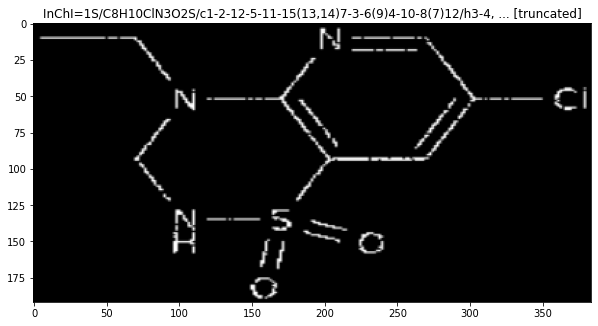


IMAGE SHAPE : (192, 384, 3)
IMAGE INCHI : ['InChI=1S/', 'C', '23', 'H', '33', 'N', '3', 'O', '2', 'S', '/c', '1', '-', '14', '-', '10', '-', '15', '(', '2', ')', '25', '-', '23', '(', '28', ')', '19', '(', '14', ')', '12', '-', '24', '-', '22', '(', '27', ')', '20', '-', '13', '-', '29', '-', '21', '(', '16', '(', '20', ')', '3', ')', '11', '-', '17', '-', '6', '-', '8', '-', '18', '(', '9', '-', '7', '-', '17', ')', '26', '(', '4', ')', '5', '/h', '10', ',', '13', ',', '17', '-', '18', 'H', ',', '6', '-', '9', ',', '11', '-', '12', 'H', '2', ',', '1', '-', '5', 'H', '3', ',', '(', 'H', ',', '24', ',', '27', ')', '(', 'H', ',', '25', ',', '28', ')', '<END>', '<END>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']



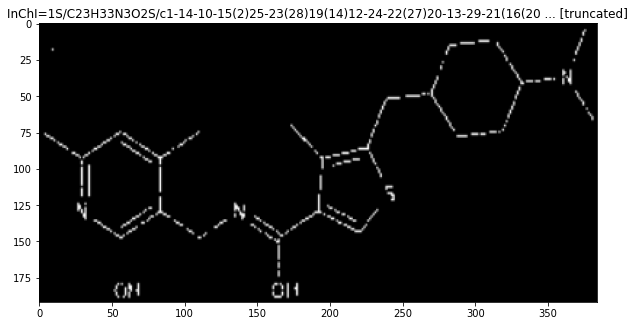


... DECODING RAW TFRECORD DATASETS COMPLETED ...



In [48]:
print("\n... DECODING RAW TFRECORD DATASETS STARTING ...\n")

# Decode the tfrecords completely –– decode is our `_parse_function` (from recipe above)
train_ds = raw_train_ds.map(lambda x: decode(x, is_test=False))
val_ds = raw_val_ds.map(lambda x: decode(x, is_test=False))
test_ds = raw_test_ds.map(lambda x: decode(x, is_test=True))

print(f"\n... THE DECODED TF.DATA.TFRECORDDATASET OBJECT:" \
      f"\n\t--> ((image), (image_id - optional), (inchi))" \
      f"\n\t--> {train_ds}\n")

print("\n... 2 EXAMPLES OF IMAGES AND LABELS AFTER DECODING ...")
for i, (img, inchi) in enumerate(train_ds.take(2)):
    print(f"\nIMAGE SHAPE : {img.shape}")
    print(f"IMAGE INCHI : {[int_2_tok[x] for x in inchi.numpy()]}\n")
    plt.figure(figsize=(10,10))
    plt.imshow(img.numpy().astype(np.int64), cmap="gray")
    plt.title(f"{''.join([int_2_tok[x] for x in inchi.numpy() if x!=0][:50])} ... [truncated]")
    plt.show()

print("\n... DECODING RAW TFRECORD DATASETS COMPLETED ...\n")

<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">4.4 WORKING WITH `TF.DATA.DATASET` OBJECTS</h3>

---

With the above parsing methods defined, we can define how to load the dataset with more options and further apply shuffling, bacthing, etc. In particular the following methods and attributes are of special interest to us:
* Use **`num_parallel_reads`** in **`tf.data.TFRecordDataset`** to read files in parallel.
* Set **`tf.data.Options.experimental_deterministic=False`** and use it to get a new dataset that ignores the order of elements.
* Use **`num_parallel_calls`** in **`tf.data.Dataset.map()`** method to have parallel processing.
* Use **`tf.data.Dataset.prefetch()`** to allow later batches to be prepared while the current batch is being processed.
* Use **`tf.data.AUTOTUNE`** to automatically determine parallelization argument values

The parallel processing and prefetching are particular important when working with TPU:
* This is because a TPU can process batches very quickly
* The dataset pipeline should be able to provide data for TPU efficiently, otherwise the TPU will be idle.

**In the cell below we will create the functions and configuration template which will later be used to create our respective datasets**

<div class="alert alert-block alert-info" style="margin: 2em; line-height: 1.7em; font-family: Verdana;">
    <b style="font-size: 16px;">📖 &nbsp; REFERENCE:</b><br><br>
    - <a href="https://www.tensorflow.org/guide/data"><b>Guide - tf.data: Build TensorFlow Input Pipelines</b></a><br>
    - <a href="https://www.tensorflow.org/guide/data_performance"><b>Guide - Better Performance With the tf.data API</b></a><br>
    - <a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset"><b>tf.data.Dataset Documentation</b></a><br>
</div>

In [49]:
# def load_dataset(filenames, is_test=False, ordered=False, tokenized_inchi=True):
#     """Read from TFRecords.
    
#     For optimal performance, reading from multiple files at once and disregarding data order (if `ordered=False`).
#         - If pulling InChI from TFRecords than order does not matter since we will 
#           be shuffling the data anyway (for training dataset).
          
#     Args:
#         filenames (list of strings): List of paths to that point to the respective TFRecord files
#         is_test (bool, optional): Whether or not to include the image ID or label in the returned dataset
#         ordered (bool, optional): Whether to ensured ordered results or maximize parallelization
#         tokenized_inchi (bool, optional): Whether our dataset includes the tokenized inchi or we will be 
#             creating it from the caption numpy array
        
#     Returns:
#         Decoded tf.data.Dataset object
#     """

#     options = tf.data.Options()
#     if not ordered:
#         # disable order, increase speed
#         options.experimental_deterministic = False
#         N_PARALLEL=tf.data.AUTOTUNE
#     else:
#         N_PARALLEL=None
        
#     # If not-ordered, this will read in by automatically interleaving multiple tfrecord files.
#     dataset = tf.data.TFRecordDataset(filenames, num_parallel_reads=N_PARALLEL)
    
#     # If not-ordered, this will ensure that we use data as soon as it 
#     # streams in, rather than in its original order.
#     dataset = dataset.with_options(options) 
    
#     # parse and return a dataset w/ the appropriate configuration
#     dataset = dataset.map(
#         lambda x: decode(x, is_test, tokenized_inchi),
#         num_parallel_calls=N_PARALLEL,
#     )
    
#     return dataset

# def get_dataset(filenames, batch_size, 
#                 is_test=False, 
#                 shuffle_buffer_size=1, 
#                 repeat_dataset=True, 
#                 preserve_file_order=False, 
#                 drop_remainder=True,
#                 tokenized_inchi=True,
#                 external_inchi_dataset=None):
#     """ Get a tf.data.Dataset w/ the appropriate configuration
    
#     Args:
#         TBD
        
#     Returns:
#         TBD
        
#     """
#     # Load the dataset
#     dataset = load_dataset(filenames, is_test, preserve_file_order, tokenized_inchi)
    
#     # If we are training than we will want to repeat the dataset. 
#     # We will determine the number of steps (or updates) later for 1 training epoch.
#     if repeat_dataset:
#         dataset = dataset.repeat()
    
#     # If we need to add on manually the inchi
#     if external_inchi_dataset is not None:
#         # Zip the datasets and tile the 1 channel image to 3 channels & drop the old inchi value
#         dataset = tf.data.Dataset.zip((dataset, external_inchi_dataset))
#         dataset = dataset.map(lambda x,y: (tf.tile(tf.expand_dims(x[0], -1), tf.constant([1,1,3], tf.int32)), y))
                              
#     # Shuffling
#     if shuffle_buffer_size!=1:
#         dataset = dataset.shuffle(shuffle_buffer_size)
    
#     # Batching
#     dataset = dataset.batch(batch_size, drop_remainder=drop_remainder)
    
#     # prefetch next batch while training (autotune prefetch buffer size)
#     dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
    
#     return dataset


def load_dataset(filenames, is_test=False, ordered=False, tokenized_inchi=True):
    """Read from TFRecords.
    
    For optimal performance, reading from multiple files at once and disregarding data order (if `ordered=False`).
        - If pulling InChI from TFRecords than order does not matter since we will 
          be shuffling the data anyway (for training dataset).
          
    Args:
        filenames (list of strings): List of paths to that point to the respective TFRecord files
        is_test (bool, optional): Whether or not to include the image ID or label in the returned dataset
        ordered (bool, optional): Whether to ensured ordered results or maximize parallelization
        tokenized_inchi (bool, optional): Whether our dataset includes the tokenized inchi or we will be 
            creating it from the caption numpy array
        
    Returns:
        Decoded tf.data.Dataset object
    """

    options = tf.data.Options()
    if not ordered:
        # disable order, increase speed
        options.experimental_deterministic = False
        N_PARALLEL=tf.data.AUTOTUNE
    else:
        N_PARALLEL=None
        
    # If not-ordered, this will read in by automatically interleaving multiple tfrecord files.
    dataset = tf.data.TFRecordDataset(filenames, num_parallel_reads=N_PARALLEL)
    
    # If not-ordered, this will ensure that we use data as soon as it 
    # streams in, rather than in its original order.
    dataset = dataset.with_options(options) 
    
    # parse and return a dataset w/ the appropriate configuration
    dataset = dataset.map(
        lambda x: decode(x, is_test, tokenized_inchi),
        num_parallel_calls=N_PARALLEL,
    )
    
    return dataset

def get_dataset(filenames, batch_size, 
                is_test=False, 
                shuffle_buffer_size=1, 
                repeat_dataset=True, 
                preserve_file_order=False, 
                drop_remainder=True,
                tokenized_inchi=True,
                external_inchi_dataset=None,
                test_padding=0):
    """ Get a tf.data.Dataset w/ the appropriate configuration
    
    Args:
        TBD
        test_padding (int, optional): Amount required to pad dataset to have only full batches
        
    Returns:
        TBD
        
    """
    # Load the dataset
    dataset = load_dataset(filenames, is_test, preserve_file_order, tokenized_inchi)
    
    if test_padding!=0:
        pad_dataset = tf.data.Dataset.from_tensor_slices((
            tf.zeros((test_padding, *IMG_SHAPE), dtype=TARGET_DTYPE),       # Fake Images
            tf.constant(["000000000000",]*test_padding, dtype=tf.string))   # Fake IDs
        )
        dataset = dataset.concatenate(pad_dataset)
    
    # If we are training than we will want to repeat the dataset. 
    # We will determine the number of steps (or updates) later for 1 training epoch.
    if repeat_dataset:
        dataset = dataset.repeat()
    
    # If we need to add on manually the inchi
    if external_inchi_dataset is not None:
        # Zip the datasets and tile the 1 channel image to 3 channels & drop the old inchi value
        dataset = tf.data.Dataset.zip((dataset, external_inchi_dataset))
        dataset = dataset.map(lambda x,y: (tf.tile(tf.expand_dims(x[0], -1), tf.constant([1,1,3], tf.int32)), y))
                              
    # Shuffling
    if shuffle_buffer_size!=1:
        dataset = dataset.shuffle(shuffle_buffer_size)
    
    # Batching
    dataset = dataset.batch(batch_size, drop_remainder=drop_remainder)
    
    # prefetch next batch while training (autotune prefetch buffer size)
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
    
    return dataset


... TRAINING CONFIGURATION:
	--> filenames              : ['records_01_57.tfrec', 'records_02_57.tfrec', '...']
	--> batch_size             : 512
	--> is_test                : False
	--> shuffle_buffer_size    : 3072
	--> repeat_dataset         : True
	--> preserve_file_order    : False
	--> drop_remainder         : True
	--> tokenized_inchi        : True
	--> external_inchi_dataset : None
	--> test_padding           : 0

... VALIDATION CONFIGURATION:
	--> filenames              : ['records_01_02.tfrec', 'records_02_02.tfrec', '...']
	--> batch_size             : 512
	--> is_test                : False
	--> shuffle_buffer_size    : 1
	--> repeat_dataset         : True
	--> preserve_file_order    : False
	--> drop_remainder         : True
	--> tokenized_inchi        : True
	--> external_inchi_dataset : None
	--> test_padding           : 0

... TESTING CONFIGURATION:
	--> filenames              : ['records_01_41.tfrec', 'records_02_41.tfrec', '...']
	--> batch_size             : 512
	--

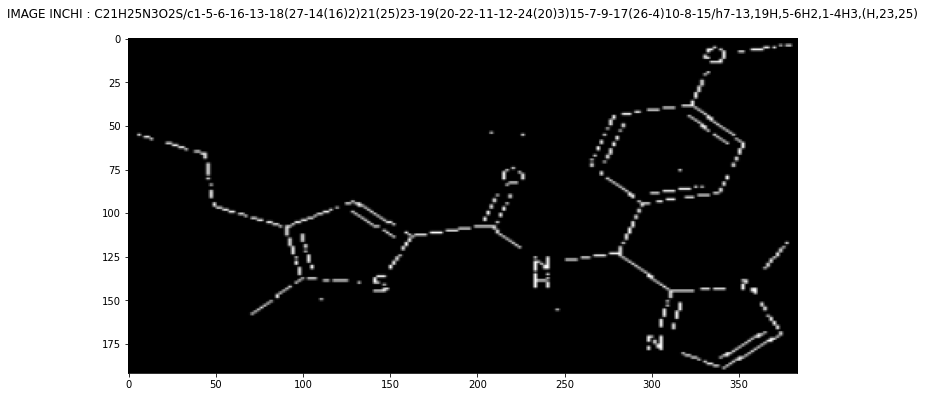

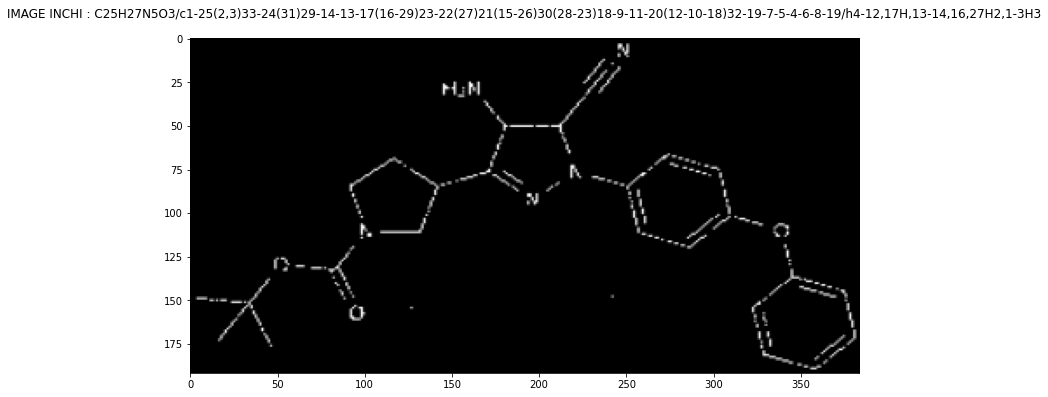



 ... SOME TESTING EXAMPLES ... 




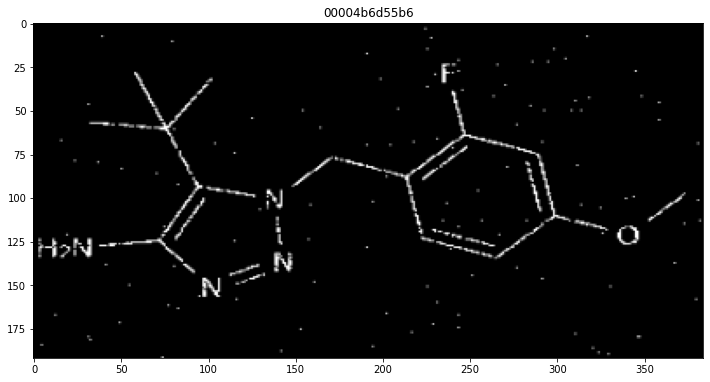

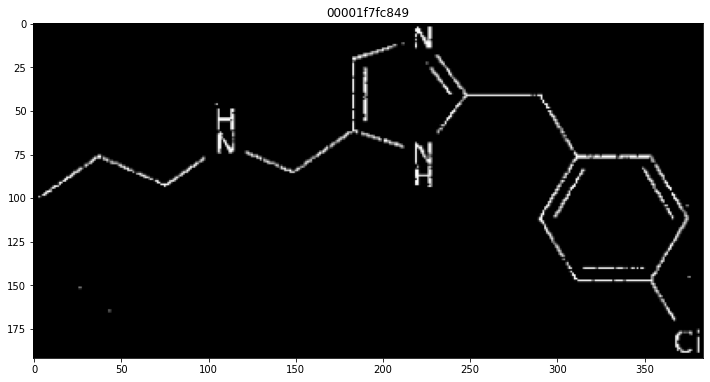

In [50]:
####### ####### ####### ####### ####### ####### ####### #######

# Template Configuration
DS_TEMPLATE_CONFIG = dict(
    filenames=[],
    batch_size=1,
    is_test=False, 
    shuffle_buffer_size=1, 
    repeat_dataset=True, 
    preserve_file_order=False, 
    drop_remainder=True,
    tokenized_inchi=True,
    external_inchi_dataset=None,
    test_padding=0
)

####### ####### ####### ####### ####### ####### ####### #######

# Individual Respective Configurations
TRAIN_DS_CONFIG = DS_TEMPLATE_CONFIG.copy()
TRAIN_DS_CONFIG.update(dict(
    filenames=TRAIN_TFREC_PATHS,
    batch_size=OVERALL_BATCH_SIZE,
    shuffle_buffer_size=OVERALL_BATCH_SIZE*6,
))

VAL_DS_CONFIG = DS_TEMPLATE_CONFIG.copy()
VAL_DS_CONFIG.update(dict(
    filenames=VAL_TFREC_PATHS,
    batch_size=OVERALL_BATCH_SIZE,
))

TEST_DS_CONFIG = DS_TEMPLATE_CONFIG.copy()
TEST_DS_CONFIG.update(dict(
    filenames=TEST_TFREC_PATHS,
    batch_size=OVERALL_BATCH_SIZE,
    is_test=True,
    repeat_dataset=False,
    drop_remainder=False,
    test_padding=REQUIRED_DATASET_PAD,
))

####### ####### ####### ####### ####### ####### ####### #######

train_ds = get_dataset(**TRAIN_DS_CONFIG)
val_ds = get_dataset(**VAL_DS_CONFIG)
test_ds = get_dataset(**TEST_DS_CONFIG)

for SPLIT, CONFIG in zip(["TRAINING", "VALIDATION", "TESTING"], [TRAIN_DS_CONFIG, VAL_DS_CONFIG, TEST_DS_CONFIG]): # , TEST_DS_CONFIG]
    print(f"\n... {SPLIT} CONFIGURATION:")
    for k,v in CONFIG.items():
        if k=="filenames":
            print(f"\t--> {k:<23}: {[path.split('/', 4)[-1] for path in v[:2]]+['...']}")
        else:
            print(f"\t--> {k:<23}: {v}")

print(f"\n\n... TRAINING DATASET   : {train_ds} ...")
print(f"... VALIDATION DATASET : {val_ds} ...")
print(f"... TESTING DATASET    : {test_ds}    ...\n")

print("\n\n ... SOME VALIDATION EXAMPLES ... \n\n")
for x,y in val_ds.take(1):
    for i in range(2):
        plt.figure(figsize=(12,12))
        plt.imshow(x[i].numpy().astype(np.int64))
        plt.title(f"IMAGE INCHI : {''.join([int_2_tok[z] for z in y[i].numpy() if z not in [0,1,2]])}\n")
        plt.show()
        
print("\n\n ... SOME TESTING EXAMPLES ... \n\n")
for x,y in test_ds.take(1):
    for i in range(2):
        plt.figure(figsize=(12,12))
        plt.imshow(x[i].numpy().astype(np.int64))
        plt.title(f"{y[i].numpy().decode()}")
        plt.show()

<br>


<a id="model_preperation"></a>


<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: navy; background-color: #ffffff;" id="model_preperation">5&nbsp;&nbsp;MODEL PREPERATION&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></h1>

In this section we prepare the models for training. We will be using a model architecture very similar to that found within the [**Show, Attend, and Tell Research Paper**](https://arxiv.org/pdf/1502.03044.pdf).

<br>

<center><img src="https://kelvinxu.github.io/projects/diags/model_diag.png" width=50%></center>
    
<br>

<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">5.1 UNDERSTANDING THE MODELS - ENCODER</h3>

---

We will be leveraging an [**EfficientNetV2**](https://arxiv.org/pdf/2104.00298) model to act as the Encoder CNN in our network. 
* On **TPU/GPU/CPU** we will use an **EfficientNetV2-B2** model

<br>

<sub><sup>***Basic View of EfficientNetB0 Architecture w/ 380x380x3 Input ... this is very similar to EfficientNetV2***</sup></sub>
<center><img src="https://www.researchgate.net/publication/339462624/figure/fig1/AS:862263699316737@1582591094412/The-architecture-of-EfficientNet-b0.ppm" width=75%></center>

<br>

Our encoder will create feature maps for each image which will in turn be passed to the decoder side of the network. 

<br>

**In the following cell, we will create a function to generate our encoder model.**


<div class="alert alert-block alert-info" style="margin: 2em; line-height: 1.7em; font-family: Verdana;">
    <b style="font-size: 16px;">📌 &nbsp; NOTE:</b><br><br>- For different encoder architectures we will have a different number of feature maps. i.e. If we utilized <b>EfficientNetV2B7</b> we would have <b>2560</b> feature maps instead of the <b>1280</b> feature maps that <b>EfficientNetV2B0</b> produces. 
</div>

<div class="alert alert-block alert-info" style="margin: 2em; line-height: 1.7em; font-family: Verdana;">
    <b style="font-size: 16px;">📖 &nbsp; REFERENCE:</b><br><br>
    - <a href="https://www.tensorflow.org/tutorials/load_data/tfrecord"><b>TF Tutorial – Transformer Model for Language Understanding</b></a><br>
    - <a href="https://www.tensorflow.org/tutorials/text/image_captioning"><b>TF Tutorial – Image Captioning</b></a><br>
    - <a href="https://www.tensorflow.org/tutorials/text/nmt_with_attention"><b>TF Tutorial – Neural Machine Translation w/ Attention</b></a><br>
</div>

In [51]:
# Will yield, at the lowest feature level, (6,12,208) or (72,208)
def get_efficientnetv2_backbone(model_name, include_top=False, input_shape=(192,384,3), pooling=None, weights=None):
    # Catch unsupported arguments
    if pooling or weights or include_top:
        raise NotImplementedError("\n...At this time we only want to use the raw " \
                                  "(no pretraining), headless, features with no pooling ...\n")
    backbone = effnetv2_model.EffNetV2Model(model_name=model_name)    
    backbone(tf.ones((BATCH_SIZE_DEBUG,*input_shape)), training=False, features_only=True)
    return backbone

In [52]:
print("\n... ENCODER MODEL CREATION STARTING ...\n")

# SAMPLE IMAGES
SAMPLE_IMGS, SAMPLE_LBLS = next(iter(val_ds.unbatch().batch(BATCH_SIZE_DEBUG)))

# ENCODER_CONFIG
PREPROCESSING_FN = tf.keras.applications.efficientnet.preprocess_input
BB_FN = get_efficientnetv2_backbone

# This will be the dimension the network outputs flattened
IMG_EMB_DIM = (6,12,208)
print(f"\n... RAW BB OUTPUT: {IMG_EMB_DIM} ...\n")
IMG_EMB_DIM = (IMG_EMB_DIM[0]*IMG_EMB_DIM[1], IMG_EMB_DIM[2])

class Encoder(tf.keras.Model):
    def __init__(self, image_embedding_dim, preprocessing_fn, backbone_fn, image_shape, do_permute=False, include_top=False, pretrained_weights=None, scale_factor=0):
        """ TODO
        
        Args:
            TODO        
        
        Returns:
            TODO
        """
        super(Encoder, self).__init__()
        
        self.image_embedding_dim = image_embedding_dim
        self.preprocessing_fn = preprocessing_fn
        self.encoder_backbone = backbone_fn(model_name=EV2_NAME, include_top=include_top, weights=pretrained_weights, input_shape=image_shape)        
        self.reshape = tf.keras.layers.Reshape(self.image_embedding_dim, name='image_embedding')
        self.permute = tf.keras.layers.Permute([2, 1], name='permute_features')
        self.do_permute = do_permute
        self.include_top = include_top
        self.scale_factor = scale_factor
        
    def call(self, x, training):
        """ TODO
        
        Args:
            TODO        
        
        Returns:
            TODO
        """
        x = self.preprocessing_fn(x)
        x = self.encoder_backbone(x, training=training, features_only=not self.include_top)[self.scale_factor]
        x = self.reshape(x, training=training)
        if self.do_permute:
            x = self.permute(x, training=training)
        return x
    
# Example enoder output
with tf.device('/CPU:0'):
    encoder = Encoder(IMG_EMB_DIM, PREPROCESSING_FN, BB_FN, IMG_SHAPE, do_permute=IMG_EMB_DIM[1]<IMG_EMB_DIM[0])
    img_embedding_batch = encoder(SAMPLE_IMGS)
print(f'\n... Encoder Output Shape  :  (batch_size, embedding_length, embedding_depth)  :  {img_embedding_batch.shape} ...\n')

print("\n... ENCODER MODEL CREATION FINISHED ...\n")


... ENCODER MODEL CREATION STARTING ...


... RAW BB OUTPUT: (6, 12, 208) ...


... Encoder Output Shape  :  (batch_size, embedding_length, embedding_depth)  :  (2, 72, 208) ...


... ENCODER MODEL CREATION FINISHED ...



<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">5.2 UNDERSTANDING THE MODELS - DECODER</h3>

---

We will be leveraging a decoder nearly identical to that found in the [**Show, Attend, and Tell Research Paper**](https://arxiv.org/pdf/1502.03044). This paper introduces an archiecture for image captioning that incorporates attention (Soft and Hard Attention). We will be utilizing Bahdanau Attention (Soft Attention) within this notebook. The core components of our decoder will be:

* **Attention Mechanism <sub></sup>[(Partly Quoting From Mark Wijkhuizen's Notebook)](https://www.kaggle.com/markwijkhuizen/tensorflow-tpu-training-baseline-lb-16-92)</sup></sub>**
    * The attention mechanism takes as input the hidden state from the LSTM, which is the LSTM state after the last predicted character, and encoder features. 
        * The hidden LSTM state will differ each prediction iteration, but the encoder result remains the same. 
        * Using this hidden LSTM state the attention mechanism learns which encoder features are important and which are not, given an LSTM state.
    * To make this idea of attention a bit less abstract, let us take the a random InChI string as an example...
        * **`C13H5F5N2/c14-7-3-6(5-19)1-2-10(7)20-13-11(17)8(15)4-9(16)12(13)18/h1-4,20H`**
        * Let's say the model has so far correctly predicted **`C13H5`**, the attention mechanism should now focus on features containing **`F`** atoms and disregard any feature maps that target **`C`** or **`H`** atoms. 
        * The LSTM hidden state should tell the attention mechanism it has predicted **`C13H5`** so far and the attention mechanism will learn it has to focus on **`F`** atoms after **`C`** and **`H`** atoms are predicted.
        * The idea of 'focus' in this case refers to giving weight to certain parts of the feature maps where the attention should believes should be important.<br><br>

* **Recurrent Mechanism – Embedding & LSTM/GRU <sub></sup>[(Partly Quoting From Mark Wijkhuizen's Notebook)](https://www.kaggle.com/markwijkhuizen/tensorflow-tpu-training-baseline-lb-16-92)</sup></sub>**
    * The Embedding layer will learn a representation to convert the chemical token/characters into a representative vector
    * The LSTMCell takes a concatenated context vector from the attention mechanism and an embedded token value as input. 
    * The LSTMCell hidden and carry states are initialized using the encoder features.

<br>

<sub><sup>***Basic Overview of the Image Captioning Process With Some Rudimentary Math***</sup></sub>
<center><img src="https://i.ibb.co/H2fkVpL/attn.gif" alt="attn_gif" border="0" width="80%"></center>

<br>

**In the following cell, we will create a function to generate our decoder model.**

<div class="alert alert-block alert-info" style="margin: 2em; line-height: 1.7em; font-family: Verdana;">
    <b style="font-size: 16px;">📌 &nbsp; NOTE:</b><br><br>- We decided to utilize an LSTM cell for the Recurrent portion of our decoder network. This decision is based on the concept that LSTMs can generally handle longer sequences better than GRUs. That being said, other options do exist. 
</div>

<div class="alert alert-block alert-info" style="margin: 2em; line-height: 1.7em; font-family: Verdana;">
    <b style="font-size: 16px;">📖 &nbsp; REFERENCE:</b><br><br>
    - <a href="https://www.tensorflow.org/tutorials/load_data/tfrecord"><b>TF Tutorial – Transformer Model for Language Understanding</b></a><br>
    - <a href="https://www.tensorflow.org/tutorials/text/image_captioning"><b>TF Tutorial – Image Captioning</b></a><br>
    - <a href="https://www.tensorflow.org/tutorials/text/nmt_with_attention"><b>TF Tutorial – Neural Machine Translation w/ Attention</b></a><br>
</div>

In [53]:
print("\n... ATTENTION MECHANISM LAYER CREATION STARTING ...\n")
# TO BE REPLACED W/ --> tfa.seq2seq.BahdanauAttention
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, attn_emb_depth):
        """ TODO
        
        Args:
            TODO        
        
        Returns:
            TODO
        """
        super(BahdanauAttention, self).__init__()
        self.W1 = tf.keras.layers.Dense(attn_emb_depth)
        self.W2 = tf.keras.layers.Dense(attn_emb_depth)
        self.V = tf.keras.layers.Dense(1)

    def call(self, hidden, features, training):
        """ TODO
        
        Args:
            TODO        
        
        Returns:
            TODO
        """
        # hidden shape == (batch_size, hidden size)
        # hidden_with_time_axis shape == (batch_size, 1, hidden size)
        # features shape == (batch_size, img_emb_size, hidden size)
        # we are doing this to broadcast addition along the time axis to calculate the score
        hidden_with_time_axis = tf.expand_dims(hidden, 1)

        # score shape == (batch_size, img_emb_size, 1)
        # we get 1 at the last axis because we are applying score to self.V
        # img_emb_size refers to the product of the image embedding width and height (144 for EB)
        # the shape of the tensor before applying self.V is (batch_size, img_emb_size, attention_emb_depth)
        score = self.V(
            tf.nn.tanh(self.W1(hidden_with_time_axis, training=training) + \
                       self.W2(features, training=training)), 
            training=training
        )

        # attention_weights shape (before & after) == (batch_size, img_emb_size, 1)
        attention_weights = tf.nn.softmax(score, axis=1)

        # context_vector shape after multiplication is (batch_size, img_emb_size, 1)
        context_vector = attention_weights * features
        
        # context_vector shape after sum == (batch_size, hidden_size)
        context_vector = tf.reduce_sum(context_vector, axis=1) # this is axis 2 in some implementations?
        
        return context_vector, attention_weights
    
    
# ATTN_EMB_DIM  = 512
# N_RNN_UNITS   = 1024
with tf.device('/CPU:0'):
    attn_layer = BahdanauAttention(ATTN_EMB_DIM)
    context_vector, attn_weights = attn_layer(tf.zeros([BATCH_SIZE_DEBUG, IMG_EMB_DIM[0]]), img_embedding_batch)

print(f'\n... Context Vector Shape     :  (batch_size, img_emb_dim_depth)     :  {context_vector.shape}   ...')
print(f'... Attention Weights Shape  :  (batch_size, img_emb_dim_shape, 1)  :  {attn_weights.shape} ...\n')

print("\n... ATTENTION MECHANISM LAYER CREATION FINISHED ...\n")


... ATTENTION MECHANISM LAYER CREATION STARTING ...


... Context Vector Shape     :  (batch_size, img_emb_dim_depth)     :  (2, 208)   ...
... Attention Weights Shape  :  (batch_size, img_emb_dim_shape, 1)  :  (2, 72, 1) ...


... ATTENTION MECHANISM LAYER CREATION FINISHED ...



In [54]:
print("\n... DECODER MODEL CREATION STARTING ...\n")

class Decoder(tf.keras.Model):
    def __init__(self, vocab_len, attn_emb_depth, img_emb_dim, n_rnn_units, dropout_rate=0.25):
        """ TODO
        
        Args:
            TODO        
        
        Returns:
            TODO
        """
        super(Decoder, self).__init__()
        
        # Basic Parameters
        self.vocab_len = vocab_len
        self.attn_emb_depth = attn_emb_depth
        self.img_emb_dim = img_emb_dim
        self.n_rnn_units = n_rnn_units
        self.dropout_rate = dropout_rate
        
        # Attention Mechanism
        self.attention_layer = BahdanauAttention(self.attn_emb_depth)
        
        # LSTM hidden and carry state initialization
        self.init_h_layer = tf.keras.layers.Dense(
            units=n_rnn_units, input_shape=[img_emb_dim], name='img_embedding__hidden_init_layer'
        )
        self.init_c_layer = tf.keras.layers.Dense(
            units=n_rnn_units, input_shape=[img_emb_dim], name='img_embedding__input_act_init_layer'
        )
        
        # Character Embedding Layer In The Decoder
        #    - TODO ... `mask_zero=True` ???
        self.embedding_layer = tf.keras.layers.Embedding(vocab_len, n_rnn_units, )
        
        # The LSTM cell
        self.lstm_cell_layer = tf.keras.layers.LSTMCell(n_rnn_units, name='lstm_cell_layer')
        
        # Dropout Layer to Prevent Overfitting
        self.dropout_layer = tf.keras.layers.Dropout(self.dropout_rate, name='dropout_layer')
        
        # Fully Connected Prediction Layer 
        self.fcn_layer = tf.keras.layers.Dense(units=vocab_len, input_shape=[n_rnn_units], dtype=tf.float32, name='fc_prediction_layer')

    def call(self, token, hidden, memory, img_emb, training):
        """ TODO
        
        Args:
            TODO        
        
        Returns:
            TODO
        """
        # img_emb shape == (batch_size, img_emb_shape, hidden_size)
        #    --> We ignore the attention weights for now (_)
        context_vector, _ = self.attention_layer(hidden, img_emb, training=training)

        # shape after passing token through embedding == (batch_size, 1, n_rnn_units)
        # shape after passing through squeeze == (batch_size, n_rnn_units)
        tok_emb = tf.squeeze(self.embedding_layer(token, training=training), axis=1)
        
        # shape after concatenation == (batch_size, n_rnn_units + hidden_size)
        x = tf.concat((context_vector, tok_emb), axis=-1)

        # passing the concatenated vector to the LSTM cell
        #    - also getting the new hidden (h) and memory (c) vectors
        _, (hidden_new, memory_new) = self.lstm_cell_layer(x, (hidden, memory), training=training)
        
        #### ##### ##### ####
        # MORE LSTM LAYERS? #
        #### ##### ##### ####
        
       # compute prediction logits and leverage dropout
        output = self.dropout_layer(hidden_new, training=training)
        output = self.fcn_layer(output, training=training)

        return output, hidden_new, memory_new
    
    def init_hidden_state(self, img_emb, training):
        mean_encoder_out = tf.math.reduce_mean(img_emb, axis=1)
        hidden = self.init_h_layer(mean_encoder_out, training=training)  # (batch_size, n_rnn_units)
        memory = self.init_c_layer(mean_encoder_out, training=training)
        return hidden, memory


with tf.device('/CPU:0'):
    decoder = Decoder(VOCAB_LEN, ATTN_EMB_DIM, IMG_EMB_DIM[0], N_RNN_UNITS)
    h, c = decoder.init_hidden_state(img_embedding_batch[:BATCH_SIZE_DEBUG], training=False)
    pred_output, h, c = decoder(tf.random.uniform((BATCH_SIZE_DEBUG, 1)), h, c, img_embedding_batch)

print(f'\n... Decoder Output Shape  :  (batch_size, vocab_len)  :  {pred_output.shape} ...\n')

print("\n... DECODER MODEL CREATION FINISHED ...\n")


... DECODER MODEL CREATION STARTING ...


... Decoder Output Shape  :  (batch_size, vocab_len)  :  (2, 197) ...


... DECODER MODEL CREATION FINISHED ...



<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">5.3 CREATE A LEARNING RATE SCHEDULER</h3>

---

Adapting the learning rate for your stochastic gradient descent optimization procedure can increase performance and reduce training time. Sometimes this is called learning rate annealing or adaptive learning rates. Here we will call this approach a learning rate schedule. See [**this article**](https://machinelearningmastery.com/using-learning-rate-schedules-deep-learning-models-python-keras/) for a basic tutorial on learning rade schedules.


We will utilize a basic step function following a warmup phase. Warmup is commonly used in learning rate schedule where we start training a model with a much smaller learning rate and increase it during the first few epochs/steps until the initial learning rate is used.

Intuitively, this method will allow a model to adjust itself less before it becomes more familiar with the dataset. This usually prevents breaking pretrained weights. For adaptive optimisers like Adam, warmup also allows the optimizers to compute bettere statistics of the gradients.


... LEARNING RATE SCHEDULE CREATION STARTING ...



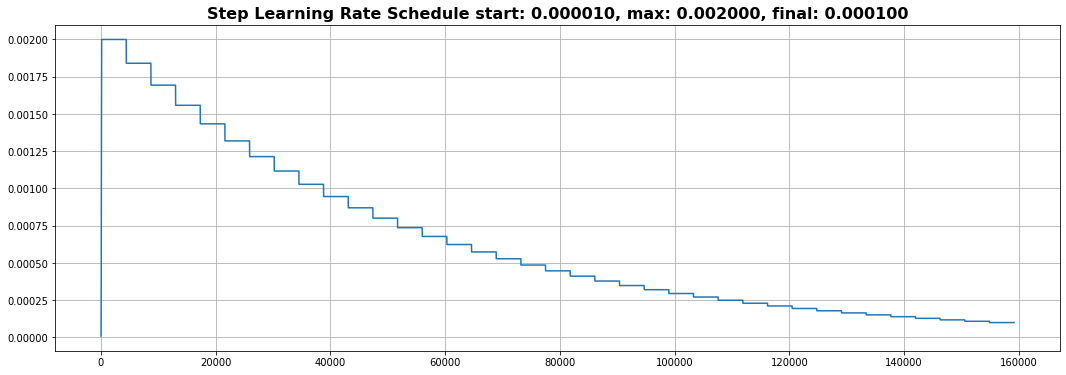


... LEARNING RATE SCHEDULE CREATION FINISHED ...



In [63]:
print("\n... LEARNING RATE SCHEDULE CREATION STARTING ...\n")

# Part of the Training Configuration
EPOCHS = 36
TOTAL_STEPS = TRAIN_STEPS*EPOCHS

# Learning Rate Scheduler Configuration
WARM_STEPS = 100
WARM_START_LR = 1e-5
PEAK_START_LR = 2e-3
FINAL_LR = 1e-4

def lr_schedule_fn(step, total_steps, warm_lr_start, warm_steps, peak_lr_start, lr_final, n_epochs):
    """ Function to generate the learning rate for a given step based on parameters
    
    Args:
        step (int): The current step for which to calculate the respective learning rate
        total_steps (int): The total number of steps for the entire training regime
        warm_lr_start (float): The starting learning rate prior to warmup
        warm_steps (int): The number of steps for which the learning rate will ramp up
            to the desired peak learning rate value (more steps will result in less
            dramatic changes to existing weights... better for pretrained models)
        peark_lr_start (float): The starting learning rate after warmup (peak value)
        lr_final (float): The final learning rate to step down to by the end of training
        n_epochs (int): The total number of epochs for the training regime
    
    Returns:
        The learning rate (float) to be used for a given step
    """
    
    # exponential warmup
    if step < warm_steps:
        warmup_factor = (step / warm_steps) ** 2
        lr_rate = warm_lr_start + (peak_lr_start - warm_lr_start) * warmup_factor    
    
    # staircase decay
    else:
        power = (step - warm_steps) // ((total_steps - warm_steps) / (n_epochs + 1))
        decay_factor =  ((peak_lr_start / lr_final) ** (1 / n_epochs)) ** power
        lr_rate = peak_lr_start / decay_factor
        
    return round(lr_rate, 8)


def plot_lr_schedule(lr_schedule, name=""):
    """ Plot the learning rate schedule over the course of training
    
    Args:
        lr_schedule (list of floats): The values to use for the LR over the
            course of training
        name (str, optional): A name for the LR schedule
    
    Returns:
        None; A plot of the how the learning rate changes over time will be displayed
    
    """
    schedule_info = f'start: {lr_schedule[0]:.6f}, max: {max(lr_schedule):.6f}, final: {lr_schedule[-1]:.6f}'
    plt.figure(figsize=(18,6))
    plt.plot(lr_schedule)
    plt.title(f"Step Learning Rate Schedule {name+', ' if name else name}{schedule_info}", size=16, fontweight="bold")
    plt.grid()
    plt.show()
    
class LRS():
    """ LEARNING RATE SCHEDULER OBJECT"""
    def __init__(self, optimizer, lr_schedule):
        self.opt = optimizer
        self.lr_schedule = lr_schedule
        
        # assign initial learning rate
        self.lr = lr_schedule[0]
        self.opt.learning_rate.assign(self.lr)
        
    def step(self, step):
        self.lr = self.lr_schedule[step]
        # assign learning rate to optimizer
        self.opt.learning_rate.assign(self.lr)
        
    def get_counter(self):
        return self.c
    
    def get_lr(self):
        return self.lr

# Create the Schedule and Plot
lr_schedule = [
    lr_schedule_fn(step, TOTAL_STEPS, WARM_START_LR, WARM_STEPS, PEAK_START_LR, FINAL_LR, EPOCHS) \
    for step in range(TOTAL_STEPS)
]
plot_lr_schedule(lr_schedule)

print("\n... LEARNING RATE SCHEDULE CREATION FINISHED ...\n")

<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">5.4 WRAP THE CONFIGURATION DETAILS IN A CLASS OBJECT FOR EASY ACCESS</h3>

---


In [64]:
class Config():
    def __init__(self,):
        self.encoder_config = {}
        self.decoder_config = {}
        self.lr_config = {}
    def initialize_encoder_config(self, image_embedding_dim, preprocessing_fn, backbone_fn, image_shape, do_permute=False, pretrained_weights=None):
        self.encoder_config = dict(
            image_embedding_dim=image_embedding_dim, 
            preprocessing_fn=preprocessing_fn, 
            backbone_fn=backbone_fn, 
            image_shape=image_shape, 
            do_permute=do_permute, 
            pretrained_weights=pretrained_weights,
        )
    def initialize_decoder_config(self, vocab_len, attn_emb_depth, img_emb_dim, n_rnn_units, dropout_rate=0.05):
        self.decoder_config = dict(
            vocab_len=vocab_len, 
            attn_emb_depth=attn_emb_depth, 
            img_emb_dim=img_emb_dim, 
            n_rnn_units=n_rnn_units, 
            dropout_rate=dropout_rate,
        )
    def initialize_lr_config(self, total_steps, warm_lr_start, warm_steps, peak_lr_start, lr_final, n_epochs):
        self.lr_config = dict(
            total_steps=total_steps, 
            warm_lr_start=warm_lr_start, 
            warm_steps=warm_steps, 
            peak_lr_start=peak_lr_start, 
            lr_final=lr_final, 
            n_epochs=n_epochs,
        )
        
training_config = Config()
training_config.initialize_encoder_config(image_embedding_dim=IMG_EMB_DIM, 
                                          preprocessing_fn=PREPROCESSING_FN, 
                                          backbone_fn=BB_FN, 
                                          image_shape=IMG_SHAPE, 
                                          do_permute=IMG_EMB_DIM[1]<IMG_EMB_DIM[0])
training_config.initialize_decoder_config(vocab_len=VOCAB_LEN, 
                                          attn_emb_depth=ATTN_EMB_DIM, 
                                          img_emb_dim=IMG_EMB_DIM[0], 
                                          n_rnn_units=N_RNN_UNITS)
training_config.initialize_lr_config(total_steps=TOTAL_STEPS, 
                                     warm_lr_start=WARM_START_LR, 
                                     warm_steps=WARM_STEPS, 
                                     peak_lr_start=PEAK_START_LR, 
                                     lr_final=FINAL_LR, 
                                     n_epochs=EPOCHS,)

print(f"\nTRAINING ENCODER CONFIG:\n\t--> {training_config.encoder_config}\n")
print(f"TRAINING DECODER CONFIG:\n\t--> {training_config.decoder_config}\n")
print(f"TRAINING LEARNING RATE CONFIG:\n\t--> {training_config.lr_config}\n")


TRAINING ENCODER CONFIG:
	--> {'image_embedding_dim': (72, 208), 'preprocessing_fn': <function preprocess_input at 0x7f0e79583b00>, 'backbone_fn': <function get_efficientnetv2_backbone at 0x7f0dd69aab00>, 'image_shape': (192, 384, 3), 'do_permute': False, 'pretrained_weights': None}

TRAINING DECODER CONFIG:
	--> {'vocab_len': 197, 'attn_emb_depth': 192, 'img_emb_dim': 72, 'n_rnn_units': 512, 'dropout_rate': 0.05}

TRAINING LEARNING RATE CONFIG:
	--> {'total_steps': 159192, 'warm_lr_start': 1e-05, 'warm_steps': 100, 'peak_lr_start': 0.002, 'lr_final': 0.0001, 'n_epochs': 36}



<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">5.5 HOW TPU IMPACTS MODELS, METRICS, AND OPTIMIZERS</h3>

In order to use TPU, or [**tensorflow distribute strategy**](https://www.tensorflow.org/api_docs/python/tf/distribute) in general, certain objects will have to be created inside the **strategy's scope**

---

Here is the rule of thumb:

---

* Anything that creates variables that will be used in a distributed way must be created inside **`strategy.scope()`**.
* This includes, but is not limited to:
  - model creation
  - optimizer
  - metrics
  - sometimes, checkpoint restore
  - any custom code that creates distributed variables
* Once a variable is created inside a strategy's scope, it captures the strategy's information, and **you can use it outside the strategy's scope.**
* Unless using a high level API like **`model.fit()`**, defining something within the strategy's scope **WILL NOT automatically distribute the computation**. This will be discussed more in the section on training further down.

---

Inside the scope, everything is defined in the same way it would be outside the distribution strategy. There is, however, a particularity about the loss function which we will discuss further down as well.

**In the next cell, we instantiate the learning rate function, the loss object, and the model(s) inside the scope**

<div class="alert alert-block alert-info" style="margin: 2em; line-height: 1.7em; font-family: Verdana;">
    <b style="font-size: 16px;">📖 &nbsp; REFERENCE:</b><br><br>
    - <a href="https://www.tensorflow.org/api_docs/python/tf/distribute/experimental/TPUStrategy#scope"><b>TPUStrategy - Scope</b></a><br>
    - <a href="https://colab.research.google.com/github/tensorflow/tpu/blob/master/tools/colab/custom_training.ipynb#scrollTo=s_suB7CZNw5W"><b>Tutorial - Custom Training With TPUs</b></a><br>
</div>

In [65]:
print("\n... TRAINING PREPERATION STARTING ...\n")

def prepare_for_training(lr_config, encoder_config, decoder_config, encoder_wts=None, decoder_wts=None, verbose=0):
    """ Declare required objects under TPU session scope and return ready for training
    
    Args:
        lr_config (dict): Keyword arguments mapped to desired values for lr schedule function
        encoder_config (dict): Keyword arguments mapped to desired values for encoder model instantiation
        decoder_config (dict): Keyword arguments mapped to desired values for decoder model instantiation    
        encoder_wts (str, optional): Path to pretrained model weights for encoder
        decoder_wts (str, optional): Path to pretrained model weights for decoder
        verbose (bool, optional): Whether or not to print model information and plot lr schedule
        
    Returns:
        loss_fn - TBD
        metrics - TBD
        optimizer - TBD
        lr_scheduler - TBD
        encoder - TBD
        decoder - TBD
        
    """
    

    # Everything must be declared within the scope when leveraging the TPU strategy
    #     - This will still function properly if scope is set to another type of accelerator
    with strategy.scope():
        
        print("\t--> CREATING LOSS FUNCTION ...")
        # Declare the loss object
        #     - Sparse categorical cross entropy loss is used as root loss
        loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
            from_logits=True, reduction=tf.keras.losses.Reduction.NONE
        )
        
        def loss_fn(real, pred):
            # Convert to uint8
            mask = tf.math.not_equal(real, 0)
            loss_ = loss_object(real, pred)
            loss_ *= tf.cast(mask, dtype=loss_.dtype)

            # https://www.tensorflow.org/tutorials/distribute/custom_training#define_the_loss_function
            loss_ = tf.nn.compute_average_loss(loss_, global_batch_size=REPLICA_BATCH_SIZE)
            return loss_
        
        
        # def loss_fn(real, pred):
        #     per_example_loss = loss_object(real, pred)
        #     return tf.nn.compute_average_loss(per_example_loss, global_batch_size=OVERALL_BATCH_SIZE)
        
        # Declare the metrics
        #    - Loss (train only) and sparse categorical accuracy will be used
        print("\t--> CREATING METRICS ...")
        metrics = {
            'batch_loss':tf.keras.metrics.Mean(),
            'train_loss': tf.keras.metrics.Mean(),
            'train_acc': tf.keras.metrics.SparseCategoricalAccuracy(),
            'val_loss': tf.keras.metrics.Mean(),
            'val_acc': tf.keras.metrics.SparseCategoricalAccuracy(),
            'val_lsd': tf.keras.metrics.Mean(), 
        }
        
        print("\t--> CREATING OPTIMIZER ...")
        # Instiate an optimizer
        optimizer = tf.keras.optimizers.Adam()
        
        print("\t--> CREATING LEARNING RATE SCHEDULER ...")
        # Declare the learning rate schedule (try this as actual lr schedule and list...)
        lr_schedule = [
            lr_schedule_fn(step=step, **lr_config) \
            for step in range(lr_config["total_steps"])
        ]
        lr_scheduler = LRS(optimizer, lr_schedule)
        
        # Instantiate the encoder model 
        print("\t--> CREATING ENCODER MODEL ARCHITECTURE ...")
        encoder = Encoder(**encoder_config)
        initialization_batch = encoder(
            tf.ones(((REPLICA_BATCH_SIZE,)+encoder_config["image_shape"]), dtype=TARGET_DTYPE), 
            training=False,
        )
        
        # Instantiate the decoder model
        print("\t--> CREATING DECODER MODEL ARCHITECTURE...")
        decoder = Decoder(**decoder_config)
        init_h, init_c = decoder.init_hidden_state(initialization_batch[:REPLICA_BATCH_SIZE], training=False)
        pred_output, h, c = decoder(
            tf.random.uniform((REPLICA_BATCH_SIZE, 1)), 
            init_h, init_c, initialization_batch, 
            training=False,
        )
        
        # Load weights after variable initialization
        if encoder_wts is not None:
            print("\t--> LOADING ENCODER MODEL WEIGHTS ...")
            encoder.load_weights(encoder_wts)
        if decoder_wts is not None:
            print("\t--> LOADING DECODER MODEL WEIGHTS ...")
            decoder.load_weights(decoder_wts)
        
    # Show the model architectures and plot the learning rate
    if verbose:
        print("\n\n... ENCODER MODEL SUMMARY...\n")
        print(encoder.summary())

        print("\n\n... DECODER MODEL SUMMARY...\n")
        print(decoder.summary())

        print("\n\n... LR SCHEDULE PLOT...\n")
        plot_lr_schedule(lr_schedule)
  
    return loss_fn, metrics, optimizer, lr_scheduler, encoder, decoder
    
    
print("\n... GENERATING THE FOLLOWING:")
# Instantiate our required training components in the correct scope
loss_fn, metrics, optimizer, lr_scheduler, encoder, decoder = \
    prepare_for_training(lr_config=training_config.lr_config,
                         encoder_config=training_config.encoder_config,
                         decoder_config=training_config.decoder_config,
                         encoder_wts=(ENCODER_CKPT_PATH if ENCODER_CKPT_PATH!="" else None),
                         decoder_wts=(DECODER_CKPT_PATH if DECODER_CKPT_PATH!="" else None),
                         verbose=0,)

print("\n... TRAINING PREPERATION FINISHED ...\n")


... TRAINING PREPERATION STARTING ...


... GENERATING THE FOLLOWING:
	--> CREATING LOSS FUNCTION ...
	--> CREATING METRICS ...
	--> CREATING OPTIMIZER ...
	--> CREATING LEARNING RATE SCHEDULER ...
	--> CREATING ENCODER MODEL ARCHITECTURE ...
	--> CREATING DECODER MODEL ARCHITECTURE...

... TRAINING PREPERATION FINISHED ...



<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">5.6 LOSS CLASSES AND REDUCTION</h3>

In order to accurately calculate loss when leveraging a TPU, we have to accumulate the losses that will be calculated across the individual replicas. Knowing this we are limited to using a **`reduction`** value of **`SUM`** or **`NONE`** as the default value and some of the other options will not work with TPU.

---

During training, when a batch is [**distributed to the replicas**](https://www.tensorflow.org/api_docs/python/tf/distribute/Strategy#run), each replica receives a part of the batch and
calculates the loss values separately. We **SHOULD NOT** calculate the average of the per-example losses on the (partial) batch the replica recieves. 

**The intuition behind this is as follows:**

---
* The gradients calculated on each replica will be synced across the replicas
    * Therefore, they are summed before the optimizer applies the gradients to update the model's parameters
* If we use the averaged per examples loss to compute the graident on each replica, the final graident applied by the optimizer will correspond to the sum of these averaged per-examples losses for respective replicas.
    * This is incorrect. The optimizer should apply the gradient obtained from the averaged per-examples loss **over the whole distributed batch**
    * It's worth noting that each replica may infact receive different number of examples. 
    * Therefore it is impossible, in general, to obtain the averaged per example loss over the whole distributed batch from by simply dividing it by the number of replicas.

---

**Therefore, we can see that for each replica, we calculate the sum of per examples losses divided by the batch size of the whole distributed batch, which will give the optimizer the correct gradients to apply.**

**EDIT**
* **In this notebook, we have the option to use [*gradient accumulation*](https://arxiv.org/pdf/1710.02368)**
* In ***gradient accumulation***, each replica receives several batches before the optimizer applies the graidents
    * we divide the sum of per examples losses by the update size (i.e. the number of examples used for one parameter update) rather than by the size of a single distributed batch.

**In the following cell we will demonstrate, using dummy values and pretending we are distributing them, how to deal with the accumulation of the loss values across replicas.**

In [66]:
print("-"*100) # Just for printing

accumulated_loss = np.zeros((BATCH_SIZE_DEBUG,))
for i in range(0, MAX_LEN, 1):
    loss = loss_fn(SAMPLE_LBLS[:, i], pred_output).numpy()
    accumulated_loss+=loss
    
    if i%50==0:
        print(f"\n\nLABEL FOR STEP {i+1} OF {MAX_LEN} FOR THE {BATCH_SIZE_DEBUG} EXAMPLES IN OUR DEMO BATCH:\n\t--> {SAMPLE_LBLS[:, i]}")
        print(f"\nOUR PREDICTIONS:\n\tSHAPE: {pred_output.shape}\n\tARGMAX: {tf.argmax(pred_output, axis=1)}")
        print(f"\nTHE CALCULATED INDIVIDUAL STEP LOSS:\n\t--> {loss_fn(SAMPLE_LBLS[:, i], pred_output).numpy()}\n\n")
        print("-"*100) # Just for printing
    
print(f"\n\n... ACCUMULATED LOSS:\n\t--> {accumulated_loss}")
print(f"\n\n... AVERAGE LOSS BY EXAMPLE:\n\t--> {accumulated_loss/MAX_LEN}")
print(f"\n\n... AVERAGE LOSS ACROSS BATCH:\n\t--> {np.sum(accumulated_loss)/(MAX_LEN*BATCH_SIZE_DEBUG)}\n\n")

print("-"*100) # Just for printing

----------------------------------------------------------------------------------------------------


LABEL FOR STEP 1 OF 138 FOR THE 2 EXAMPLES IN OUR DEMO BATCH:
	--> [1 1]

OUR PREDICTIONS:
	SHAPE: (2, 197)
	ARGMAX: [68 18]

THE CALCULATED INDIVIDUAL STEP LOSS:
	--> 0.17423579096794128


----------------------------------------------------------------------------------------------------


LABEL FOR STEP 51 OF 138 FOR THE 2 EXAMPLES IN OUR DEMO BATCH:
	--> [192 187]

OUR PREDICTIONS:
	SHAPE: (2, 197)
	ARGMAX: [68 18]

THE CALCULATED INDIVIDUAL STEP LOSS:
	--> 0.182323157787323


----------------------------------------------------------------------------------------------------


LABEL FOR STEP 101 OF 138 FOR THE 2 EXAMPLES IN OUR DEMO BATCH:
	--> [0 0]

OUR PREDICTIONS:
	SHAPE: (2, 197)
	ARGMAX: [68 18]

THE CALCULATED INDIVIDUAL STEP LOSS:
	--> 0.0


----------------------------------------------------------------------------------------------------


... ACCUMULATED LOSS:
	--> [1

<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">5.7 DISTRIBUTE THE DATASETS ACROSS REPLICAS</h3>

With an input pipeline written using the [**tf.data.Dataset**](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) API, we can use [**strategy.experimental_distribute_dataset**](https://www.tensorflow.org/api_docs/python/tf/distribute/Strategy#experimental_distribute_dataset) to turn it into a ***distributed dataset***, which produces **`per-replica`** values (which are objects of type [**PerReplica**](https://github.com/tensorflow/tensorflow/blob/v2.3.0/tensorflow/python/distribute/values.py#L361)) when iterating over it. 

For example, 

```python
    ds = (... something that is a `tf.data.Dataset` ...)
    dist_ds = strategy.experimental_distribute_dataset(ds)
```

**`dist_ds`** will now be distributed across all replicas.

---

The distributed datasets (when working with TPU) contain objects of type [**tensorflow.python.distribute.values.PerReplica**](https://github.com/tensorflow/tensorflow/blob/v2.3.0/tensorflow/python/distribute/values.py#L361), which is a subclass of [**tf.distribute.DistributedValues**](https://www.tensorflow.org/api_docs/python/tf/distribute/DistributedValues) that is the base class for representing distributed values.

When iterating over the dataset we will still get a tuple containing two values. However, the tuple now contains **`PerReplica`** objects wheras before that tuple contained tensors representing the image and the label/id respectively.

<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">5.8 DISTRIBUTED COMPUTATION & OPTIMIZING LOOPS</h3>

For each distributed batch (which contains **`PerReplica`** objects as discussed previously) produced by a distributed dataset, we use [**`strategy.run`**](https://www.tensorflow.org/api_docs/python/tf/distribute/Strategy#run) to perform a distributed computation on different TPU replicas, each processes a part of the batch.


---

To understand how **`strategy.run`** will execute across the replicas, we can look at an example:

```python
    @tf.function
    def dist_step(dist_batch):
        strategy.run(replica_fn, args=dist_batch)
        
    for dist_batch in dist_ds:
        dist_step(dist_batch)
```

Here **`replica_fn`** is a function that is going to be run on each replica, and it should work with **tensors**, not with **`PerReplica`** objects.
* You define the operations (for example, forward pass, compute loss values and gradients, etc.) to peform just like witout using TPU. 

---

When working with **`TPU`**, either [**`strategy.run`**](https://www.tensorflow.org/api_docs/python/tf/distribute/Strategy#run) has to be called inside [**`tf.function`**](https://www.tensorflow.org/api_docs/python/tf/function) or the replica function has to be annotated with [**`tf.function`**](https://www.tensorflow.org/api_docs/python/tf/function). 

For example:

```python
    @tf.function
    def replica_fn(batch):
        
        model(batch)
        ...
        
    for dist_batch in dist_ds:
        strategy.run(replica_fn, args=dist_batch)
```

The above code snippet is a high level concept, and **`replica_fn`** doesn't necessary receive a single argument. 
* In our case, the original dataset yields tuples of tensors
* A distributed batch is also a tuple of **`PerReplica`** objects and the **`replica_fn`** is actually receiving the unpacked version of a tuple of tensors as arguments.

---

If a dataset yield a single tensor, you can do things like 

```python
    @tf.function
    def replica_fn(batch):
        
        tensor0 (, ... tensorN) = batch
        model(tensor0, ... tensorN)

    strategy.run(replica_fn, args=(dist_batch,))
```

where **`replica_fn`** expects a single tensor as arugment. Even if a dataset yields tuples of tensors, the above code still works, but **`replica_fn`** expects a single tuple of tensors as argument.

---

We also have to discuss how to collect the returned values from [**`strategy.run`**](https://www.tensorflow.org/api_docs/python/tf/distribute/Strategy#run).

The results of [**`strategy.run`**](https://www.tensorflow.org/api_docs/python/tf/distribute/Strategy#run) are also 
distributed values, just like the distributed batches it takes as inputs. 
* For each return value, we can use [strategy.experimental_local_results](https://www.tensorflow.org/api_docs/python/tf/distribute/Strategy#experimental_local_results) to obtain a tuple of tensors from all replicas, and we can use [**`tf.concat`**](https://www.tensorflow.org/api_docs/python/tf/concat) to aggregate them into a single tensor.
* We will use this method to collect the labels and model predictions

---

We will need to iterate over the dataset to perform inference/train on the whole (distributed) dataset. When leveraging a TPU this is a non-trivial task. An example of iterating over a distributed dataset is:

```python
    for dist_batch in dist_ds:
        dist_step(dist_batch)
```

Every step in the loop, which calls [**`strategy.run`**](https://www.tensorflow.org/api_docs/python/tf/distribute/Strategy#run), will have a communication between the local VM (in our case, the Kaggle VM) and the remote TPU worker(s). 

**This is obviously not ideal.**

However, you can iterate the distributed dataset inside a `tf.function` as shown by:

``` python
    @tf.function
    def dist_run_on_dataset(dist_ds):
    
        for dist_batch in dist_ds:
            dist_step(dist_batch)
            
    dist_process_dataset(dist_ds)
```

This way, all the operations conducted on the dataset are compiled into a graph which is sent to the remote TPU worker(s) for execution. This will vastly reduce the running time and limit the time TPUs will sit idle waiting for data from the local VM. See [**TPU: extreme optimizations**](https://www.kaggle.com/c/flower-classification-with-tpus/discussion/135443) for a good benchmark by [**Martin Görner**](https://www.kaggle.com/mgornergoogle).

In this notebook, we use a fixed number of training steps, so we can also use

```python    
    @tf.function
    def dist_process_dataset(dist_ds_iter):
    
        for _ in tf.range(n_stes):
            dist_step(next(dist_ds_iter))
            
    dist_ds_iter = iter(dist_ds)
    dist_process_dataset(dist_ds_iter)
```

---

**With the above discussions, we are ready to define the routines used for training, validation and prediction. Let's get started!**

<div class="alert alert-block alert-info" style="margin: 2em; line-height: 1.7em; font-family: Verdana;">
    <b style="font-size: 16px;">📖 &nbsp; REFERENCE:</b><br><br>
    - <a href="https://www.tensorflow.org/tutorials/distribute/custom_training#using_iterators"><b>Tutorial - Using Iterators</b></a><br>
    - <a href="https://www.tensorflow.org/tutorials/distribute/custom_training#iterating_inside_a_tffunction"><b>Tutorial - Iterating Inside a <code>tf.function</code></b></a><br>
    - <a href="https://www.kaggle.com/c/flower-classification-with-tpus/discussion/135443"><b>Kaggle Discussion - TPU: Extreme Optimizations</b></a><br>
    - <a href="https://www.kaggle.com/mgornergoogle/custom-training-loop-with-100-flowers-on-tpu#Optimized-custom-training-loop"><b>Kaggle Notebook - Custom Training Loop With 100+ Flowers on TPU</b></a><br>
</div>


<br>


<a id="model_training"></a>


<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: navy; background-color: #ffffff;" id="model_training">6&nbsp;&nbsp;MODEL TRAINING&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></h1>

In this section we will define the training and validation routines as well as the final custom training loop that will execute everything we have worked on up until this point.

<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">6.1 INDIVIDUAL TRAIN STEP</h3>

---

INFORMATION

In [67]:
def train_step(_image_batch, _inchi_batch):
    """ Forward pass (calculate gradients)
    
    Args:
        _image_batch (): TBD
        _inchi_batch (): TBD
    
    Returns:
        tbd
    """
    
    batch_loss = tf.constant(0.0, tf.float32)   
    with tf.GradientTape() as tape:
        # image_batch_embedding has shape --> (REPLICA_BATCH_SIZE, IMG_EMB_DIM)
        image_batch_embedding = encoder(_image_batch, training=True)
        
        # hidden and memory both have the shape --> (REPLICA_BATCH_SIZE, N_RNN_UNITS)
        hidden_batch, memory_batch = decoder.init_hidden_state(image_batch_embedding, training=True)
        
        # decoder_input has a shape --> (REPLICA_BATCH_SIZE, 1)
        decoder_input_batch = tf.ones((REPLICA_BATCH_SIZE, 1), dtype=tf.uint8)
        
        # Teacher forcing - feeding the target as the next input
        for c_idx in range(1, MAX_LEN):
            gt_batch = _inchi_batch[:, c_idx]
            
            # passing enc_output to the decoder
            prediction_batch, hidden_batch, memory_batch = \
                decoder(decoder_input_batch, hidden_batch, memory_batch, image_batch_embedding, training=True)
            
            # Update Loss Accumulator
            batch_loss += loss_fn(gt_batch, prediction_batch)
            
            # Update Accuracy Metric
            metrics["train_acc"].update_state(gt_batch, prediction_batch, 
                                              sample_weight=tf.where(tf.not_equal(gt_batch, PAD_TOKEN), 1.0, 0.0))
            
            # teacher forcing, use correct character as next input to LSTMCell
            decoder_input_batch = tf.expand_dims(gt_batch, 1)

    # backpropagation using variables, gradients and loss
    #    - split this into two seperate optimizers/lrs/etc in the future
    #    - we use the batch loss accumulation to update gradients
    gradients = tape.gradient(batch_loss, encoder.trainable_variables + decoder.trainable_variables)
    gradients, _ = tf.clip_by_global_norm(gradients, 10.0)
    
    # Normalize loss across all characters    
    batch_loss = batch_loss/(MAX_LEN-1)
    
    metrics["batch_loss"].update_state(batch_loss)
    metrics["train_loss"].update_state(batch_loss)
    
    optimizer.apply_gradients(zip(gradients, encoder.trainable_variables+decoder.trainable_variables))

@tf.function
def dist_train_step(_image_batch, _inchi_batch):
    strategy.run(train_step, args=(_image_batch, _inchi_batch))

<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">6.2 INDIVIDUAL VAL STEP</h3>

---

INFORMATION

In [68]:
def val_step(_image_batch, _inchi_batch):
    """ Forward pass (calculate gradients)
    
    Args:
        image_batch (): TBD
        inchi_batch (): TBD
    
    Returns:
        tbd
    """
    
    # Initialize batch_loss
    batch_loss = tf.constant(0.0, tf.float32)   
    
    # image_batch_embedding has shape --> (REPLICA_BATCH_SIZE, IMG_EMB_DIM)
    image_batch_embedding = encoder(_image_batch, training=False)

    # hidden and memory both have the shape --> (REPLICA_BATCH_SIZE, N_RNN_UNITS)
    hidden_batch, memory_batch = decoder.init_hidden_state(image_batch_embedding, training=False)

    # decoder_input and predictions_seq share the shape --> (REPLICA_BATCH_SIZE, 1)
    decoder_input_batch = tf.ones((REPLICA_BATCH_SIZE, 1), dtype=tf.uint8)
    predictions_seq_batch = tf.ones((REPLICA_BATCH_SIZE, 1), dtype=tf.uint8)

    # Teacher forcing - feeding the target as the next input
    for c_idx in range(1, MAX_LEN):
        gt_batch = _inchi_batch[:, c_idx]
        
        # passing enc_output to the decoder
        prediction_batch, hidden_batch, memory_batch = \
            decoder(decoder_input_batch, hidden_batch, memory_batch, image_batch_embedding, training=False)

        # Update Loss Accumulator
        batch_loss += loss_fn(gt_batch, prediction_batch)
    
        # Update Accuracy Metric
        metrics["val_acc"].update_state(gt_batch, prediction_batch,
                                        sample_weight=tf.where(tf.not_equal(gt_batch, PAD_TOKEN), 1.0, 0.0))

        # no teacher forcing, predicted char is next LSTMCell input
        decoder_input_batch = tf.expand_dims(tf.cast(tf.math.argmax(prediction_batch, axis=1, output_type=tf.int32), tf.uint8), axis=1)
        predictions_seq_batch = tf.concat([predictions_seq_batch, decoder_input_batch], axis=1)
        
    # Normalize loss across all characters    
    batch_loss = batch_loss/(MAX_LEN-1)

    # Update Levenshtein Distance Metric & Loss Metric
    metrics["val_loss"].update_state(batch_loss)
    
    return predictions_seq_batch    

    
@tf.function
def dist_val_step(_val_dist_ds):
    _val_image_batch, _val_inchi_batch = next(_val_dist_ds)
    predictions_seq_batch_per_replica = strategy.run(val_step, args=(_val_image_batch, _val_inchi_batch))
    predictions_seq_batch_accum = strategy.gather(predictions_seq_batch_per_replica, axis=0)
    _val_inchi_batch_accum = strategy.gather(_val_inchi_batch, axis=0)
    return predictions_seq_batch_accum, _val_inchi_batch_accum

<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">6.3 INITIALIZE LOGGER</h3>

---

INFORMATION

In [69]:
class StatLogger():
    def __init__(self, verbose_frequency=100, print_style="tight"):
        self.train_loss = []
        self.train_acc = []
        self.val_loss = []
        self.val_acc = []
        self.val_lsd = []
        self.step = []
        self.epoch = []
        self.lr = []
        
        self.current_step = 0
        self.epoch_start_time = 0
        self.batch_start_time = 0
        self.verbose_frequency = verbose_frequency
        self.print_style = print_style
        
    def print_last_val(self, current_time):
        if self.print_style=="tight":
            print(f"| VAL DATA |  STEP {VAL_STEPS:>4}/{VAL_STEPS} |  " \
                  f"ACC: {str(self.val_acc[-1]*100)[:5]:<5} – " \
                  f"LOSS: {str(self.val_loss[-1])[:5]:<5} – " \
                  f"LSD: {str(self.val_lsd[-1]):<3} |")
        else:
            print(f'\n\n{"-"*100}\n{"-"*100}\n' \
                  f'{"-"*25:<25}{"VALIDATION ACCURACY : "+str(self.val_acc[-1]*100): ^50}{"-"*25:>25}\n' \
                  f'{"-"*100}\n' \
                  f'{"-"*25:<25}{"VALIDATION LOSS     : "+str(self.val_loss[-1]): ^50}{"-"*25:>25}\n' \
                  f'{"-"*100}\n' \
                  f'{"-"*25:<25}{"VALIDATION LSD      : "+str(self.val_lsd[-1]): ^50}{"-"*25:>25}\n' \
                  f'{"-"*100}\n{"-"*100}\n\n')
    
    def print_current_train(self, step, train_acc, train_loss, batch_loss, current_time, current_lr):
        if self.print_style=="tight":
            print(f"| TRAIN DATA |  STEP {self.current_step:>4}/{TRAIN_STEPS} | " \
                  f"ACC: {str(train_acc*100)[:5]:<5} – " \
                  f"LOSS: {str(train_loss)[:5]:<5} – " \
                  f"LR: {current_lr:.2e} " \
                  f"|   | TIME |  EPOCH: {str(round((current_time-self.epoch_start_time)/3600,1))+'h':<5} – " \
                  f"SUBSET: {str(round((current_time-self.batch_start_time)*self.verbose_frequency,1))+'s':<6} – " \
                  f"BATCH: {str(round(current_time-self.batch_start_time,1))+'s':<5} |")
        else:
            print(f'\n\n{"-"*100}\n{"-"*100}\n' \
                  f'{"-"*25:<25}{"CURRENT STEP : "+str(step)+" OF "+str(TRAIN_STEPS): ^50}{"-"*25:>25}\n' \
                  f'{"-"*100}\n' \
                  f'{"-"*25:<25}{"CURRENT TRAIN ACCURACY : "+str(train_acc*100): ^50}{"-"*25:>25}\n' \
                  f'{"-"*100}\n' \
                  f'{"-"*25:<25}{"CURRENT TRAIN LOSS     : "+str(train_loss): ^50}{"-"*25:>25}\n' \
                  f'{"-"*100}\n' \
                  f'{"-"*25:<25}{"LAST BATCH LOSS        : "+str(batch_loss): ^50}{"-"*25:>25}\n' \
                  f'{"-"*100}\n{"-"*100}\n' \
                  f'{"-"*25:<25}{"EPOCH ELAPSED TIME  : "+str(round(current_time-self.epoch_start_time,1))+" SECONDS": ^50}{"-"*25:>25}\n' \
                  f'{"-"*100}\n' \
                  f'{"-"*25:<25}{"LAST SET OF BATCHES TOOK  : ~"+str(round((current_time-self.batch_start_time)*self.verbose_frequency,1))+" SECONDS": ^50}{"-"*25:>25}\n' \
                  f'{"-"*100}\n' \
                  f'{"-"*25:<25}{"LAST SINGLE BATCH TOOK  : "+str(round(current_time-self.batch_start_time,1))+" SECONDS": ^50}{"-"*25:>25}\n' \
                  f'{"-"*100}\n{"-"*100}\n\n')

<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">6.4 CUSTOM TRAIN LOOP</h3>

---

INFORMATION

In [ ]:
# Instantiate our tool for logging
stat_logger = StatLogger()
    
for epoch in range(1,EPOCHS+1):
    print(f'\n\n{"="*100}\n{"="*25:<25}{"EPOCH #"+str(epoch): ^50}{"="*25:>25}\n{"="*100}\n')
    
    stat_logger.current_step=0
    stat_logger.epoch_start_time = time.time() # to compute epoch duration
    
    # create distributed versions of dataset to run on TPU with 8 computation units
    train_dist_ds = strategy.experimental_distribute_dataset(train_ds)
    val_dist_ds = iter(strategy.experimental_distribute_dataset(val_ds))
    
    for image_batch, inchi_batch in train_dist_ds:
                
        # Update current step
        stat_logger.batch_start_time = time.time()
        
        # Update the current step
        stat_logger.current_step += 1
        
        # Calculate training step
        dist_train_step(image_batch, inchi_batch)
        
        # end of epoch validation step
        if stat_logger.current_step == TRAIN_STEPS:
            print("\n... VALIDATION DATASET STATISTICS ... \n")
            for _ in range(VAL_STEPS):
                preds, lbls = dist_val_step(val_dist_ds)
                metrics["val_lsd"].update_state(get_levenshtein_distance(preds, lbls))
                
            # Record this epochs statistics
            stat_logger.train_loss.append(metrics["train_loss"].result().numpy())
            stat_logger.train_acc.append(metrics["train_acc"].result().numpy())
            stat_logger.val_loss.append(metrics["val_loss"].result().numpy())
            stat_logger.val_acc.append(metrics["val_acc"].result().numpy())
            stat_logger.val_lsd.append(metrics["val_lsd"].result().numpy())
            stat_logger.step.append(stat_logger.current_step)
            stat_logger.epoch.append(epoch)
            stat_logger.lr.append(lr_scheduler.lr)
            
            # Reset the validation metrics as one epoch should not effect the next
            metrics["val_lsd"].reset_states()
            metrics["val_acc"].reset_states()
            metrics["val_loss"].reset_states()
            metrics["train_acc"].reset_states()
            metrics["train_loss"].reset_states()
            metrics["batch_loss"].reset_states()
            
            # Print validation scores
            stat_logger.print_last_val(current_time=time.time())
        
        # verbose logging step
        if stat_logger.current_step % stat_logger.verbose_frequency == 0:    
            stat_logger.print_current_train(
                stat_logger.current_step,
                metrics["train_acc"].result().numpy(), 
                metrics["train_loss"].result().numpy(), 
                metrics["batch_loss"].result().numpy(), 
                current_time=time.time(),
                current_lr=lr_scheduler.lr
            )
            metrics["train_acc"].reset_states()
            metrics["train_loss"].reset_states()
            metrics["batch_loss"].reset_states()

        # stop training when NaN loss is detected
        if stat_logger.current_step == TRAIN_STEPS:
            break
            
        # update learning rate
        lr_scheduler.step(stat_logger.current_step+((epoch-1)*TRAIN_STEPS))
        
    # Save every other epoch (starting with first epoch)
    # Save after last epoch too...
    # if epoch%2==1 or epoch==EPOCHS:
    # save weights
    print("\n...SAVING MODELS TO DISK ... \n")
    encoder.save_weights(f'./encoder_epoch_{epoch}.h5')
    decoder.save_weights(f'./decoder_epoch_{epoch}.h5')



=========================                     EPOCH #1                     =========================



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:1402: UserWarning:

`layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.



| TRAIN DATA |  STEP  100/4422 | ACC: 24.12 – LOSS: 2.192 – LR: 1.96e-03 |   | TIME |  EPOCH: 0.1h  – SUBSET: 23.7s  – BATCH: 0.2s  |
| TRAIN DATA |  STEP  200/4422 | ACC: 49.14 – LOSS: 1.028 – LR: 2.00e-03 |   | TIME |  EPOCH: 0.1h  – SUBSET: 23.8s  – BATCH: 0.2s  |
| TRAIN DATA |  STEP  300/4422 | ACC: 56.07 – LOSS: 0.868 – LR: 2.00e-03 |   | TIME |  EPOCH: 0.1h  – SUBSET: 23.8s  – BATCH: 0.2s  |
| TRAIN DATA |  STEP  400/4422 | ACC: 62.09 – LOSS: 0.744 – LR: 2.00e-03 |   | TIME |  EPOCH: 0.1h  – SUBSET: 23.8s  – BATCH: 0.2s  |
| TRAIN DATA |  STEP  500/4422 | ACC: 66.74 – LOSS: 0.646 – LR: 2.00e-03 |   | TIME |  EPOCH: 0.1h  – SUBSET: 23.5s  – BATCH: 0.2s  |
| TRAIN DATA |  STEP  600/4422 | ACC: 70.35 – LOSS: 0.570 – LR: 2.00e-03 |   | TIME |  EPOCH: 0.1h  – SUBSET: 23.7s  – BATCH: 0.2s  |
| TRAIN DATA |  STEP  700/4422 | ACC: 73.22 – LOSS: 0.510 – LR: 2.00e-03 |   | TIME |  EPOCH: 0.1h  – SUBSET: 23.6s  – BATCH: 0.2s  |
| TRAIN DATA |  STEP  800/4422 | ACC: 75.60 – LOSS: 0.461 – LR

<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">6.5 JUST-IN-CASE SAVE</h3>

---

INFORMATION

In [ ]:
encoder.save_weights(f'./encoder_epoch_safety_save.h5')
decoder.save_weights(f'./decoder_epoch_safety_save.h5')

<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">6.6 VIEW PREDICTIONS & DISTRIBUTION OF LEVENSHTEIN DISTANCE FOR VAL DATASET</h3>

---

INFORMATION

In [ ]:
pred_s = []
lbls_s = []
LDS = []

for _ in tqdm(range(VAL_STEPS), total=VAL_STEPS):
    preds, lbls = dist_val_step(val_dist_ds)
    for i, (p, l) in enumerate(zip(preds.numpy(), lbls.numpy())):
        try:
            p_s = "".join([int_2_tok[x] for x in p[:np.where(p==2)[0][0]]])
        except:
            p_s = "".join([int_2_tok[x] for x in p])
        l_s = "".join([int_2_tok[x] for x in l[:np.where(l==2)[0][0]]])
        LD = Levenshtein.distance(p_s,l_s)
        
        if i % 1000==0:
            print(f"Levenshtein Distance: {LD}")
            print(f"\t--> {p_s}")
            print(f"\t--> {l_s}\n")

        pred_s.append(p_s)
        lbls_s.append(l_s)
        LDS.append(LD)
        
ld_df = pd.DataFrame({"lbl_inchi":lbls_s, "pred_inchi":pred_s, "lev_dist":LDS})
ld_df.to_csv("./levenshtein_on_val.csv")

print(ld_df.describe())
display(ld_df)

px.histogram(ld_df.lev_dist, log_y=True)

<br>


<a id="model_inference"></a>


<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: navy; background-color: #ffffff;" id="model_inference">7&nbsp;&nbsp;INFER ON TEST DATA&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></h1>

In this section we will use our trained model to generate the predictions we will use to submit to the competition

<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">7.1 INDIVIDUAL TEST STEP (AND DISTRIBUTED)</h3>

---

INFORMATION

In [ ]:
def test_step(_image_batch):
    """ Forward pass (calculate gradients)
    
    Args:
        image_batch (): TBD
        inchi_batch (): TBD
    
    Returns:
        tbd
    """
    
    # image_batch_embedding has shape --> (REPLICA_BATCH_SIZE, IMG_EMB_DIM)
    image_batch_embedding = encoder(_image_batch, training=False)

    # hidden and memory both have the shape --> (REPLICA_BATCH_SIZE, N_RNN_UNITS)
    hidden_batch, memory_batch = decoder.init_hidden_state(image_batch_embedding, training=False)

    # decoder_input and predictions_seq share the shape --> (REPLICA_BATCH_SIZE, 1)
    decoder_input_batch = tf.ones((REPLICA_BATCH_SIZE, 1), dtype=tf.uint8)
    predictions_seq_batch = tf.ones((REPLICA_BATCH_SIZE, 1), dtype=tf.uint8)

    # Teacher forcing - feeding the target as the next input
    for c_idx in range(1, MAX_LEN):
        
        # passing enc_output to the decoder
        prediction_batch, hidden_batch, memory_batch = \
            decoder(decoder_input_batch, hidden_batch, memory_batch, image_batch_embedding, training=False)

        # no teacher forcing, predicted char is next LSTMCell input
        decoder_input_batch = tf.cast(tf.expand_dims(tf.math.argmax(prediction_batch, axis=1, output_type=tf.int32), axis=1), tf.uint8)
        
        # Build the prediction sequence
        predictions_seq_batch = tf.concat([predictions_seq_batch, decoder_input_batch], axis=1)
    
    return predictions_seq_batch    

    
@tf.function
def distributed_test_step(_img_batch, _img_ids):
    per_replica_seqs = strategy.run(test_step, args=(_img_batch,))
    predictions = strategy.gather(per_replica_seqs, axis=0)
    pred_ids = strategy.gather(_img_ids, axis=0)
    return predictions, pred_ids

<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">7.2 RAW INFERENCE LOOP</h3>

---

INFORMATION

In [ ]:
# To Store The Preds
all_pred_arr = tf.zeros((1, MAX_LEN), dtype=tf.uint8)
all_pred_ids = tf.zeros((1, 1), dtype=tf.string)

# Create an iterator
dist_test_ds = iter(strategy.experimental_distribute_dataset(test_ds))
for i in tqdm(range(TEST_STEPS), total=TEST_STEPS): 
    img_batch, id_batch = next(dist_test_ds)
    preds, pred_ids = distributed_test_step(img_batch, id_batch)
    all_pred_arr = tf.concat([all_pred_arr, preds], axis=0)
    all_pred_ids = tf.concat([all_pred_ids, tf.expand_dims(pred_ids, axis=-1)], axis=0)

<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">7.3 TEST PRED POST-PROCESSING</h3>

---

INFORMATION

In [ ]:
def arr_2_inchi(arr):
    inchi_str = ''
    for i in arr:
        c = int_2_tok.get(i)
        if c=="<END>":
            break
        inchi_str += c
    return inchi_str

pred_df = pd.DataFrame({
    "image_id":[x[0].decode() for x in tqdm(all_pred_ids[1:-REQUIRED_DATASET_PAD].numpy(), total=N_TEST)], 
    "InChI":[arr_2_inchi(pred_arr) for pred_arr in tqdm(all_pred_arr[1:-REQUIRED_DATASET_PAD].numpy(), total=N_TEST)]
})

pred_df = pred_df.sort_values(by="image_id").reset_index(drop=True)
pred_df

<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">7.4 SAVE SUBMISSION.CSV</h3>

In [ ]:
pred_df.to_csv("submission.csv", index=False)